In [2]:
#importing libraries
import numpy as np
import pandas as pd

In [4]:
#loading the dataset
df = pd.read_csv('Balaji+Fast+Food+Sales+%281%29.csv')

In [6]:
#displaying the first five rows of the dataset
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [8]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


Data description:
The dataset includes sales information of Balaji's Fast Food Restaurant. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

In [11]:
#Displaying the datatype of each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [13]:
#displaying the total number of rows and columns
print('Total number of rows:',df.shape[0])
print('Total number of columns:',df.shape[1])

Total number of rows: 1000
Total number of columns: 10


In [15]:
#displaying the amount of values in the dataset
print('The dataset has',df.size,'values')

The dataset has 10000 values


In [22]:
#Checking for duplicates

In [23]:
df[df.duplicated()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


In [19]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [25]:
#Data preprocessing/cleaning

In [26]:
df['date']

0      07-03-2022
1       8/23/2022
2      11/20/2022
3      02-03-2023
4      10-02-2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

The date format varies; Some dates use '-' as seperators and some dates use '/' as seperators. And so, we will have to make the format of all date values similar.

In [27]:
#changing the date format
df['date'] = df['date'].str.replace('-','/')

In [28]:
df['date']

0      07/03/2022
1       8/23/2022
2      11/20/2022
3      02/03/2023
4      10/02/2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In the above code blocks, we have sucessfully changed the date format.

In [29]:
#converting the date format to our desired format
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['date']

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

The above code blocks were used convert the data type from object to datetime using pandas.

In [31]:
#Seperating the numerical and categorical columns

In [32]:
#displaying the columns as a list
df.columns.to_list()

['order_id',
 'date',
 'item_name',
 'item_type',
 'item_price',
 'quantity',
 'transaction_amount',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [53]:
#displaying the columns with numeric variables as a list
num = df.select_dtypes(include=np.number).columns.to_list()
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [55]:
print('The numeric variables are:',num)

The numeric variables are: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [57]:
#displaying the categorical variables
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [59]:
print('The categorical variables are:',cat)

The categorical variables are: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


In [61]:
df[num]

,order_id,item_price,quantity,transaction_amount
0,1,20,13,260
1,2,20,15,300
2,3,20,1,20
3,4,25,6,150
4,5,25,8,200
...,...,...,...,...
995,996,50,10,500
996,997,60,7,420
997,998,60,13,780
998,999,20,5,100


In [65]:
df[cat]

,date,item_name,item_type,transaction_type,received_by,time_of_sale
0,07-03-2022,Aalopuri,Fastfood,NaN,Mr.,Night
1,8/23/2022,Vadapav,Fastfood,Cash,Mr.,Afternoon
2,11/20/2022,Vadapav,Fastfood,Cash,Mr.,Afternoon
3,02-03-2023,Sugarcane juice,Beverages,Online,Mr.,Night
4,10-02-2022,Sugarcane juice,Beverages,Online,Mr.,Evening
...,...,...,...,...,...,...
995,3/19/2023,Frankie,Fastfood,NaN,Mrs.,Evening
996,9/20/2022,Sandwich,Fastfood,NaN,Mr.,Evening
997,1/26/2023,Sandwich,Fastfood,NaN,Mr.,Evening
998,8/27/2022,Panipuri,Fastfood,NaN,Mrs.,Afternoon


#### The dataset has 4 columns with numeric variables and 6 columns with categorical variables.

In [39]:
#Descriptive analysis of the the numeric variables

In [40]:
#Finding the measures of central tendencies:

In [67]:
df[num].mean()

order_id              500.500
item_price             33.315
quantity                8.162
transaction_amount    275.230
dtype: float64

In [42]:
for i in num:
    print('Mean of column',i,'is:',df[i].mean())

Mean of column order_id is: 500.5
Mean of column item_price is: 33.315
Mean of column quantity is: 8.162
Mean of column transaction_amount is: 275.23


In [43]:
df[num].median()

order_id              500.5
item_price             25.0
quantity                8.0
transaction_amount    240.0
dtype: float64

In [44]:
for i in num:
    print('Median of column',i,'is:',df[i].median())

Median of column order_id is: 500.5
Median of column item_price is: 25.0
Median of column quantity is: 8.0
Median of column transaction_amount is: 240.0


In [45]:
df[num].mode()

,order_id,item_price,quantity,transaction_amount
0,1,20.0,13.0,300.0
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
995,996,NaN,NaN,NaN
996,997,NaN,NaN,NaN
997,998,NaN,NaN,NaN
998,999,NaN,NaN,NaN


In [46]:
for i in num:
    print('Mode of column',i,'is: ',df[i].mode())
    print()
    print('*****')

Mode of column order_id is:  0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64

*****
Mode of column item_price is:  0    20
Name: item_price, dtype: int64

*****
Mode of column quantity is:  0    13
Name: quantity, dtype: int64

*****
Mode of column transaction_amount is:  0    300
Name: transaction_amount, dtype: int64

*****


Note

In [47]:
#displaying range
for i in num:
    print('Range of column',i,'is:',df[i].max()-df[i].min())

Range of column order_id is: 999
Range of column item_price is: 40
Range of column quantity is: 14
Range of column transaction_amount is: 880


In [48]:
#displaying variance
for i in num:
    print('Variance of column',i,'is:',df[i].var())

Variance of column order_id is: 83416.66666666667
Variance of column item_price is: 222.65843343343138
Variance of column quantity is: 19.475231231231273
Variance of column transaction_amount is: 41780.57767767782


In [49]:
#displaying standard deciation
for i in num:
    print('Standard Deviation of column',i,'is:',df[i].std())

Standard Deviation of column order_id is: 288.8194360957494
Standard Deviation of column item_price is: 14.921743645882387
Standard Deviation of column quantity is: 4.413075031226104
Standard Deviation of column transaction_amount is: 204.40297864189216


In [50]:
#displaying interquartile range
for i in num:
    print('IQR value of column',i,'is:',df[i].quantile(0.75)-df[i].quantile(0.25))

IQR value of column order_id is: 499.5
IQR value of column item_price is: 30.0
IQR value of column quantity is: 8.0
IQR value of column transaction_amount is: 240.0


In [51]:
#measuring the shape
#finding the type(zero, positive, negative) of skewness
for i in num:
    print('Skewness value of column',i,'is',df[i].skew())

Skewness value of column order_id is 0.0
Skewness value of column item_price is 0.6250044803515558
Skewness value of column quantity is -0.05129947454908782
Skewness value of column transaction_amount is 1.052643178230624


- The item price and transaction amount is positively skewed; the average value of the column is greater than the middle value; the outliers are greater in value when compared to the mean.

- The quantity is negatively skewed; the average value of the column is lesser than the middle value; the outliers are lesser in value when compared to the mean.

In [52]:
#finding the kurtosis vaue
for i in num:
    print('Kurtosis value of column',i,'is',df[i].kurt())

Kurtosis value of column order_id is -1.2
Kurtosis value of column item_price is -1.173262217524134
Kurtosis value of column quantity is -1.2416861155903576
Kurtosis value of column transaction_amount is 0.6554065709917558


- The kurtosis value of item price and quantity is negative and similar. It is **platykurtic** in nature.
- The kurtosis value of transaction_amount is positive. It is also **platykurtic** in nature.

In [53]:
#displaying the covariance between the columns
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


- Covariance describes the extend to which the columns are dependent on each other. The higher the covariance, the higher the dependency. 
- In this dataset, there is high covariance between item price and transaction amount, quantity and transaction amount.
- There is low covariance between item price and quantity.

In [54]:
#displaying the correlation between the columns
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


- Correlation shows the relationship between two variables. The relationship can be positive or negative in nature.
- In this dataset, all the columns(variables) are positively correlated, in which there is high positive correlation between item price and transaction amount, quantity and transaction amount; there is moderate positive correlation between item price and quantity.

In [55]:
#5 point summary

In [56]:
df[num].describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [57]:
#Co-efficient of variation


In [58]:
#Descriptive analysis of the the categorical variables

In [59]:
#Finding the measures of central tendency(mode):

In [60]:
df[cat]

,date,item_name,item_type,transaction_type,received_by,time_of_sale
0,2022-07-03,Aalopuri,Fastfood,NaN,Mr.,Night
1,2022-08-23,Vadapav,Fastfood,Cash,Mr.,Afternoon
2,2022-11-20,Vadapav,Fastfood,Cash,Mr.,Afternoon
3,2023-02-03,Sugarcane juice,Beverages,Online,Mr.,Night
4,2022-10-02,Sugarcane juice,Beverages,Online,Mr.,Evening
...,...,...,...,...,...,...
995,2023-03-19,Frankie,Fastfood,NaN,Mrs.,Evening
996,2022-09-20,Sandwich,Fastfood,NaN,Mr.,Evening
997,2023-01-26,Sandwich,Fastfood,NaN,Mr.,Evening
998,2022-08-27,Panipuri,Fastfood,NaN,Mrs.,Afternoon


In [61]:
for i in cat:
    print('Mean of column',i,'is:',df[i].value_counts(normalize=True)*100)
    print()
    print('*****')

Mean of column date is: date
2022-10-11    0.8
2022-05-09    0.8
2022-08-31    0.8
2023-03-19    0.7
2023-02-03    0.7
             ... 
2022-06-12    0.1
2022-04-15    0.1
2022-05-17    0.1
2022-07-23    0.1
2022-06-14    0.1
Name: proportion, Length: 348, dtype: float64

*****
Mean of column item_name is: item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

*****
Mean of column item_type is: item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

*****
Mean of column transaction_type is: transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64

*****
Mean of column received_by is: received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

*****
Mean of column time_of_sale is: time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.9

In [62]:
for i in cat:
    print('Mode of column',i,'is:',df[i].mode())
    print()
    print('*****')

Mode of column date is: 0   2022-05-09
1   2022-08-31
2   2022-10-11
Name: date, dtype: datetime64[ns]

*****
Mode of column item_name is: 0    Cold coffee
Name: item_name, dtype: object

*****
Mode of column item_type is: 0    Fastfood
Name: item_type, dtype: object

*****
Mode of column transaction_type is: 0    Cash
Name: transaction_type, dtype: object

*****
Mode of column received_by is: 0    Mr.
Name: received_by, dtype: object

*****
Mode of column time_of_sale is: 0    Afternoon
1        Night
Name: time_of_sale, dtype: object

*****


In [63]:
for i in cat:
    print('Unique values of column',i,'is:',df[i].unique())
    print()
    print('*****')

Unique values of column date is: <DatetimeArray>
['2022-07-03 00:00:00', '2022-08-23 00:00:00', '2022-11-20 00:00:00',
 '2023-02-03 00:00:00', '2022-10-02 00:00:00', '2022-11-14 00:00:00',
 '2022-05-03 00:00:00', '2022-12-22 00:00:00', '2022-06-10 00:00:00',
 '2022-09-16 00:00:00',
 ...
 '2023-03-06 00:00:00', '2023-02-21 00:00:00', '2023-02-19 00:00:00',
 '2023-01-07 00:00:00', '2022-09-24 00:00:00', '2022-06-29 00:00:00',
 '2022-11-21 00:00:00', '2023-01-22 00:00:00', '2023-03-30 00:00:00',
 '2022-06-14 00:00:00']
Length: 348, dtype: datetime64[ns]

*****
Unique values of column item_name is: ['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']

*****
Unique values of column item_type is: ['Fastfood' 'Beverages']

*****
Unique values of column transaction_type is: [nan 'Cash' 'Online']

*****
Unique values of column received_by is: ['Mr.' 'Mrs.']

*****
Unique values of column time_of_sale is: ['Night' 'Afternoon' 'Evening' 'Morning' 'Midnight']

**

In [64]:
#5 point summary
df[cat].describe(include='object')

,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,893,1000,1000
unique,7,2,2,2,5
top,Cold coffee,Fastfood,Cash,Mr.,Night
freq,161,686,476,512,205


In [ ]:
#DAY2

In [65]:
#Data Visualisation

In [66]:
#importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
plt.rcParams['figure.figsize']=[15,8]

In [68]:
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [69]:
cat = ['item_name','item_type','transaction_type','received_by','time_of_sale']

In [70]:
cat

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

In [71]:
#Univariate visualisation

In [72]:
#For categorical columns

In [73]:
#Plotting the frequency count of items

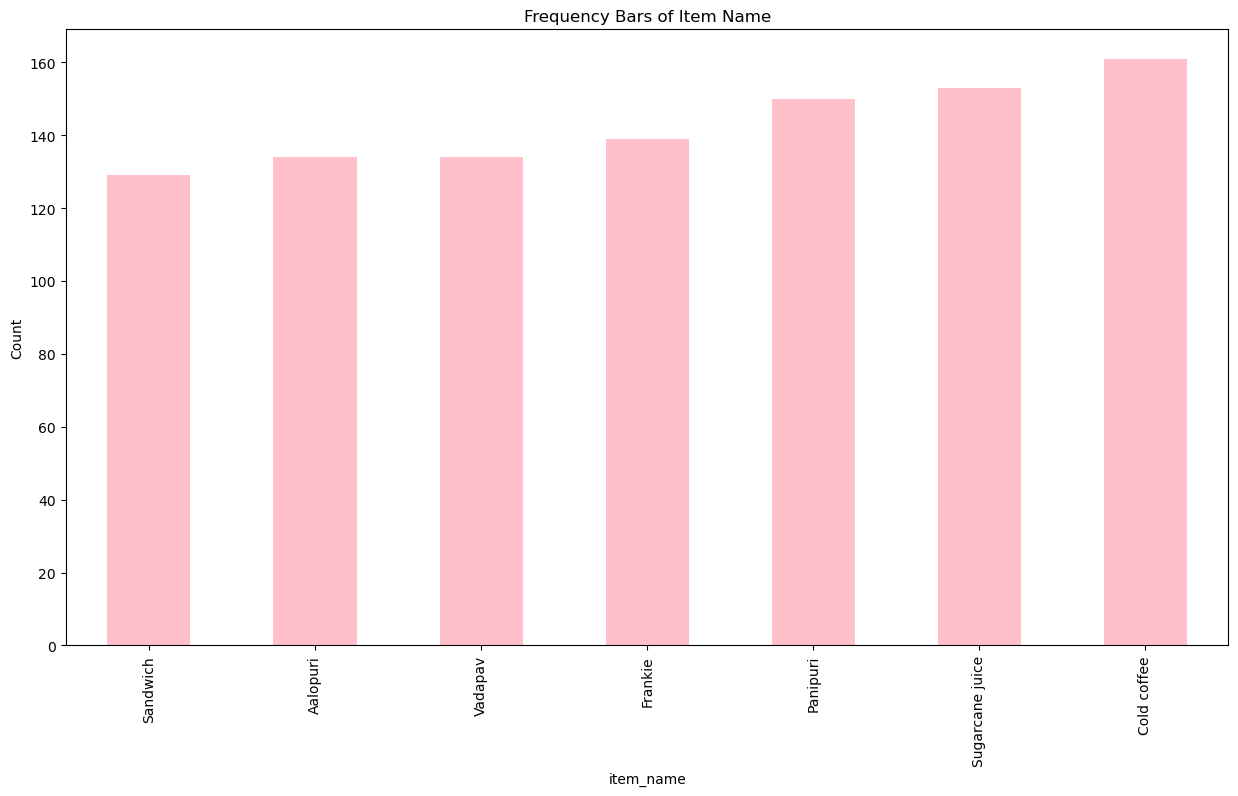

In [74]:
df['item_name'].value_counts().sort_values().plot(kind='bar',color='pink')
plt.title('Frequency Bars of Item Name')
plt.ylabel('Count')
plt.show()

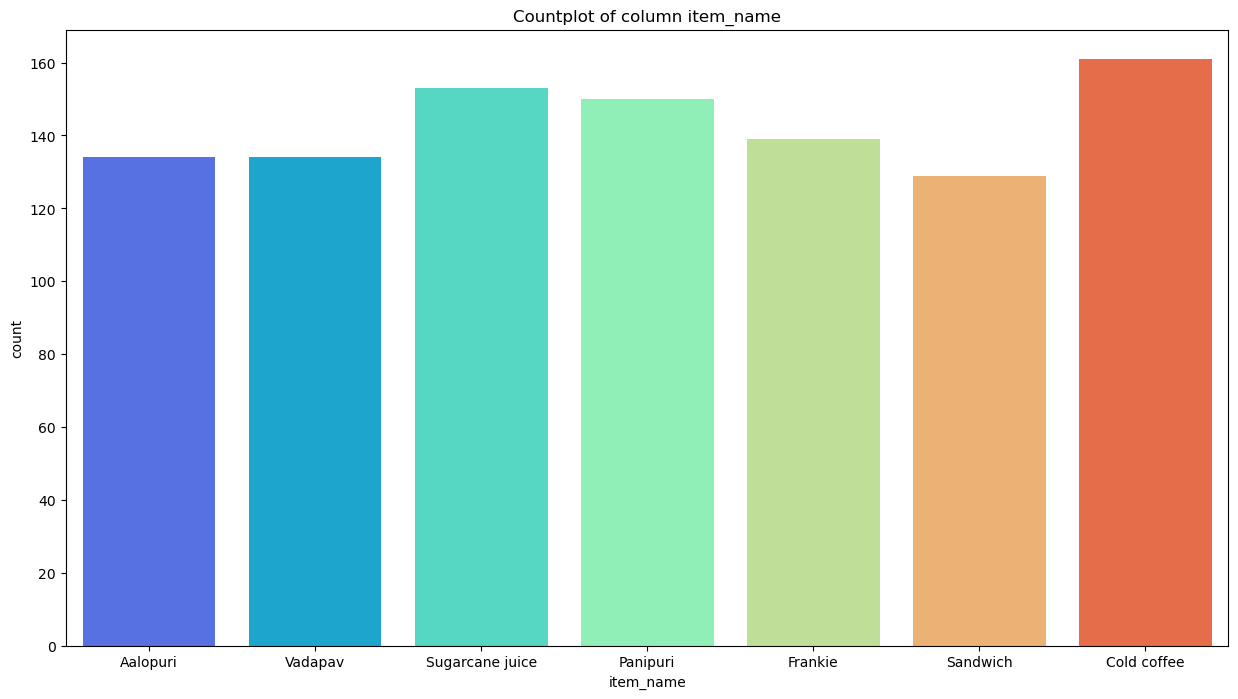

In [75]:
sns.countplot(x=df['item_name'],palette='rainbow')
plt.title('Countplot of column item_name')
plt.show()

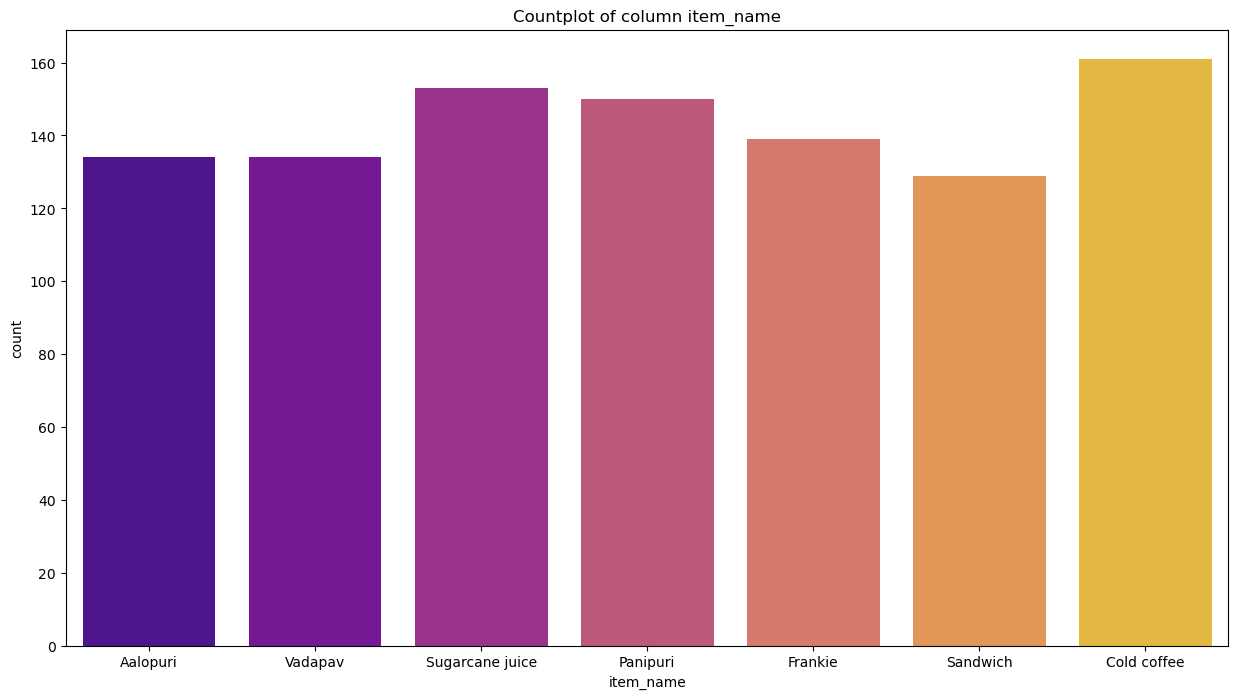

In [76]:
sns.countplot(x=df['item_name'],palette='plasma')
plt.title('Countplot of column item_name')
plt.show()

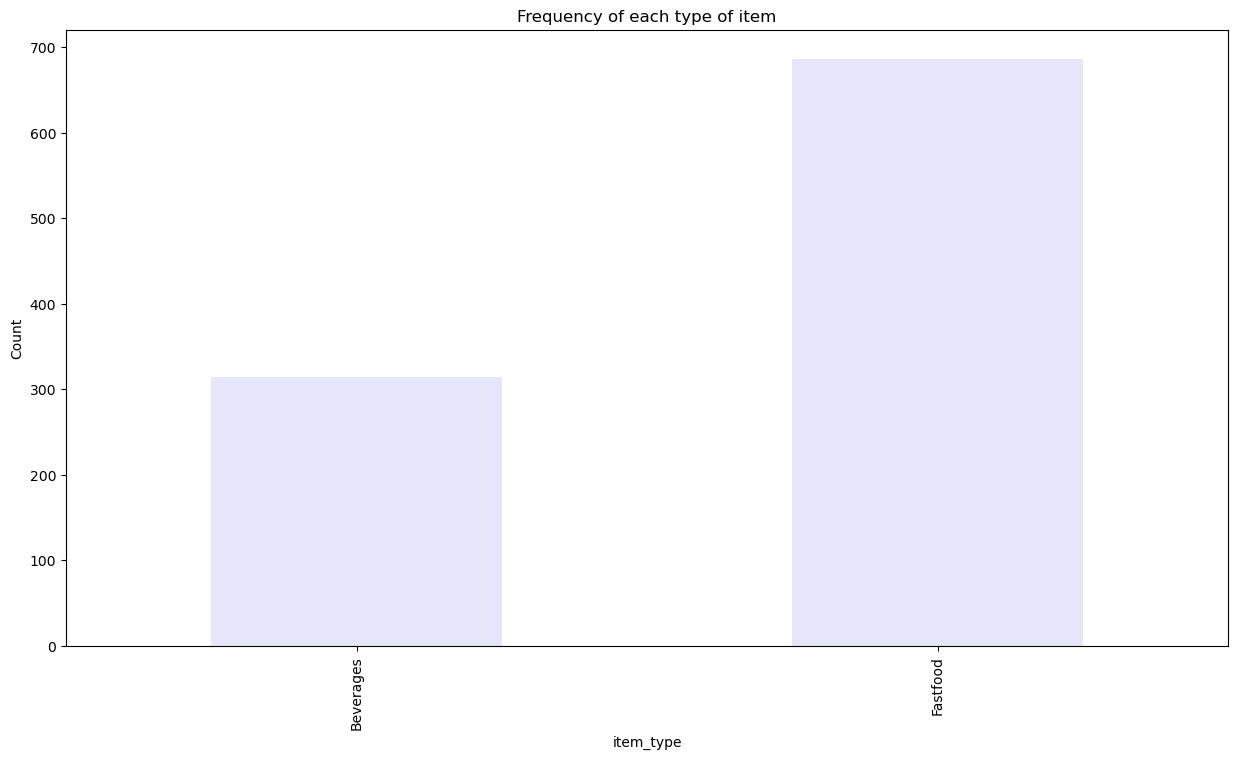

In [77]:
df['item_type'].value_counts().sort_values().plot(kind='bar',color='lavender')
plt.title('Frequency of each type of item')
plt.ylabel('Count')
plt.show()

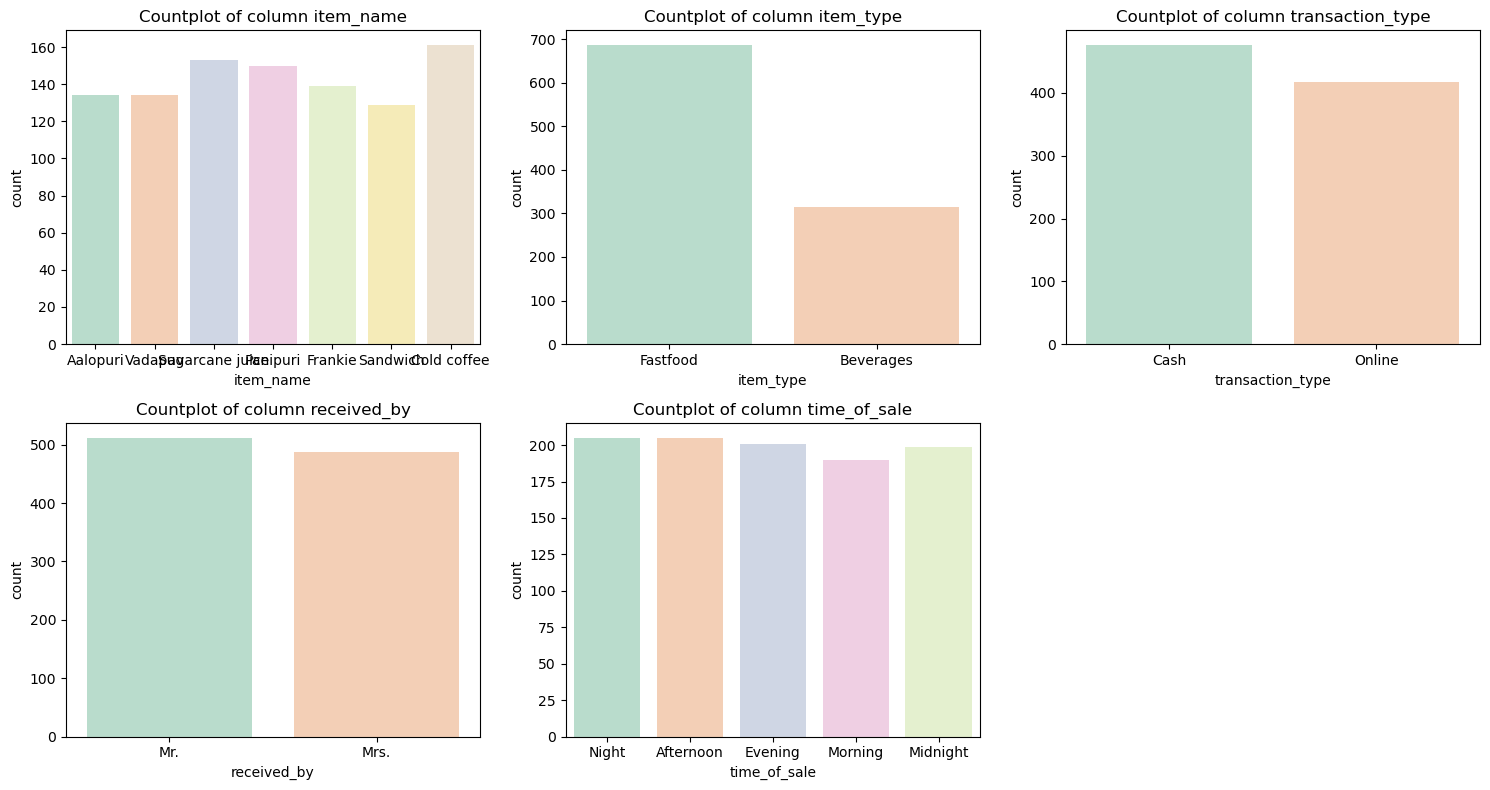

In [78]:
#plotting all the categorical columns 
t=1
for i in cat:
    plt.subplot(2,3,t)
    sns.countplot(x=df[i],palette='Pastel2')
    plt.title(f'Countplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

In [79]:
#Pie Chart

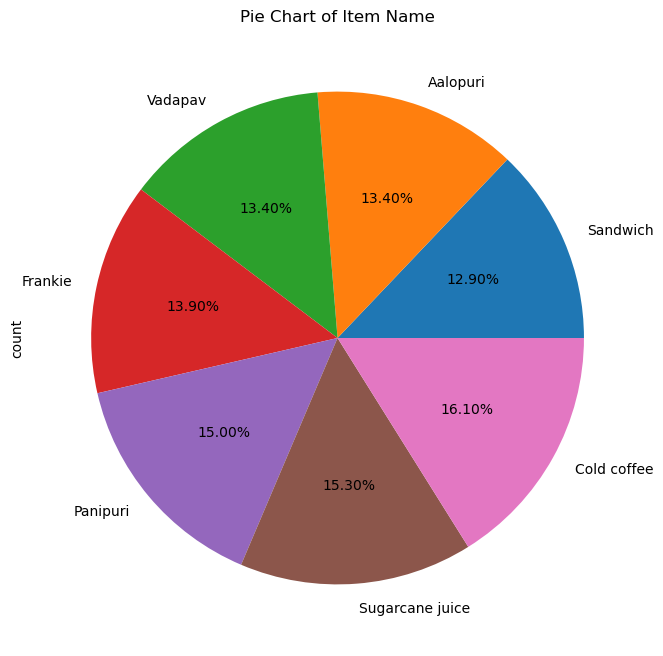

In [212]:
df['item_name'].value_counts().sort_values().plot(kind='pie',autopct='%.2f%%')
plt.title('Pie Chart of Item Name')
plt.show()

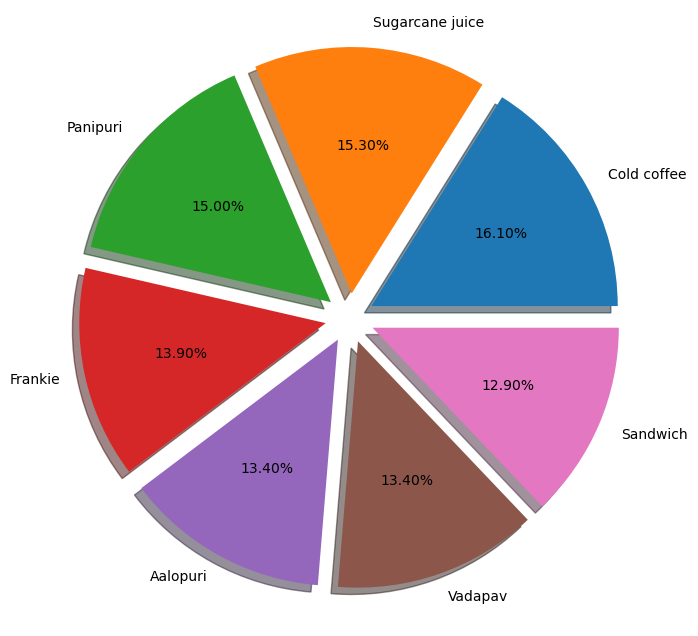

In [81]:
plt.pie(df['item_name'].value_counts(), 
        labels=df['item_name'].value_counts().index
        ,autopct='%.2f%%',shadow=True
        ,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

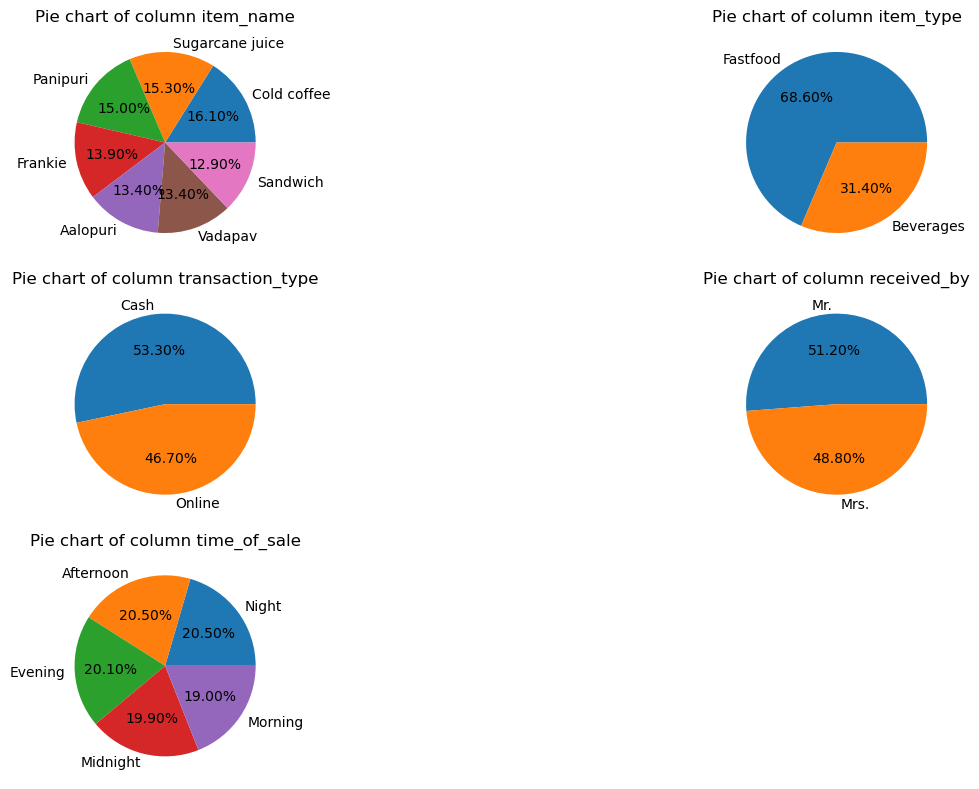

In [83]:
t=1
for i in cat:
    plt.subplot(3,2,t)
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,autopct='%.2f%%')
    plt.title(f'Pie chart of column {i}')
    t+=1
plt.tight_layout()
plt.show()

In [84]:
#histplot

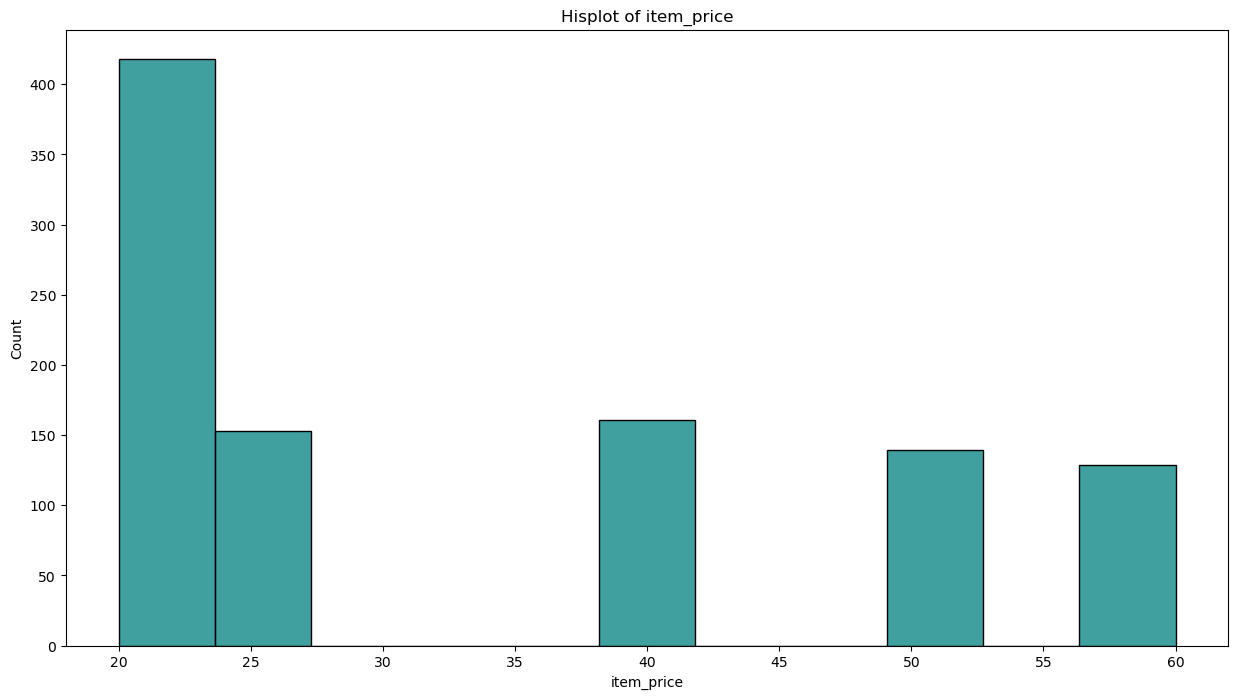

In [104]:
sns.histplot(df['item_price'],color='teal')
plt.title('Hisplot of item_price')
plt.show()

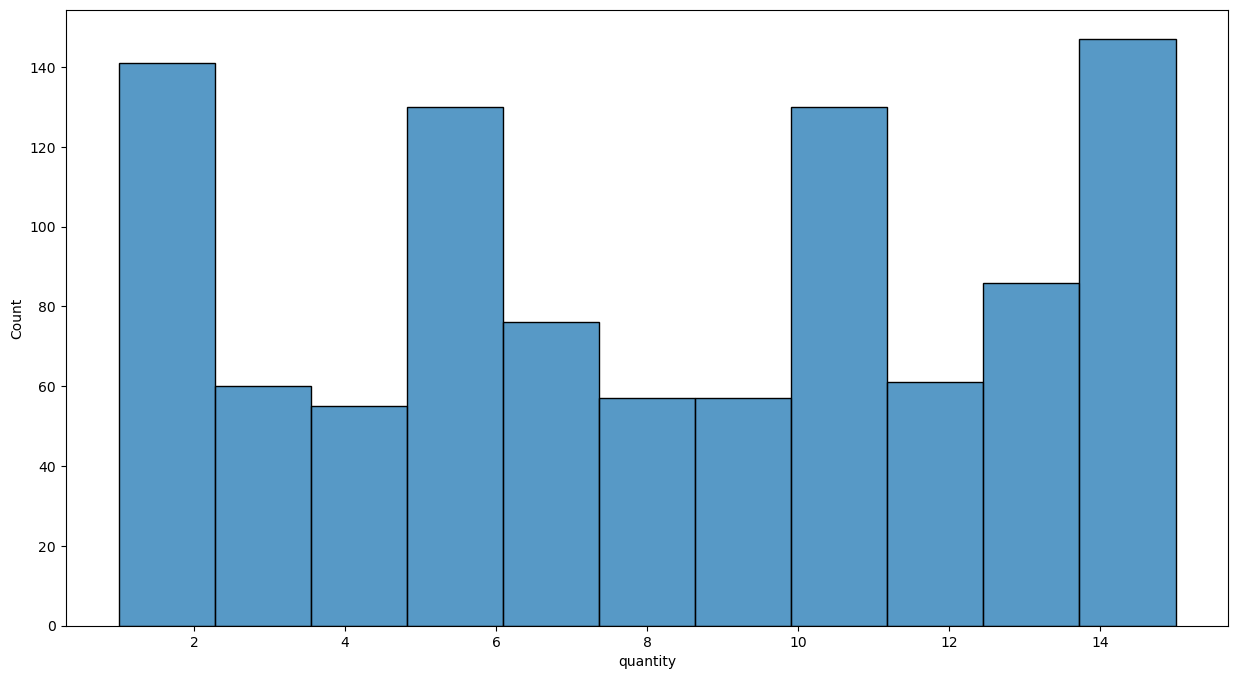

In [87]:
sns.histplot(df['quantity'])
plt.show()

In [94]:
#distplot

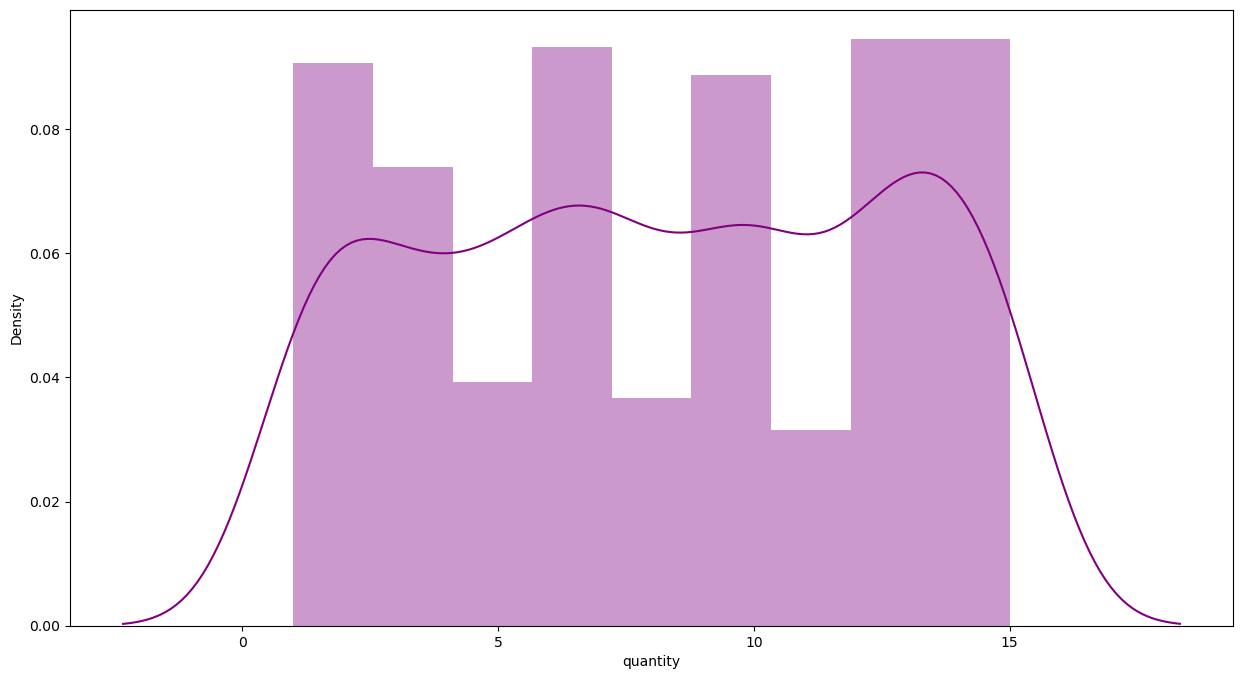

In [98]:
sns.distplot(df['quantity'],color='purple')
plt.show()

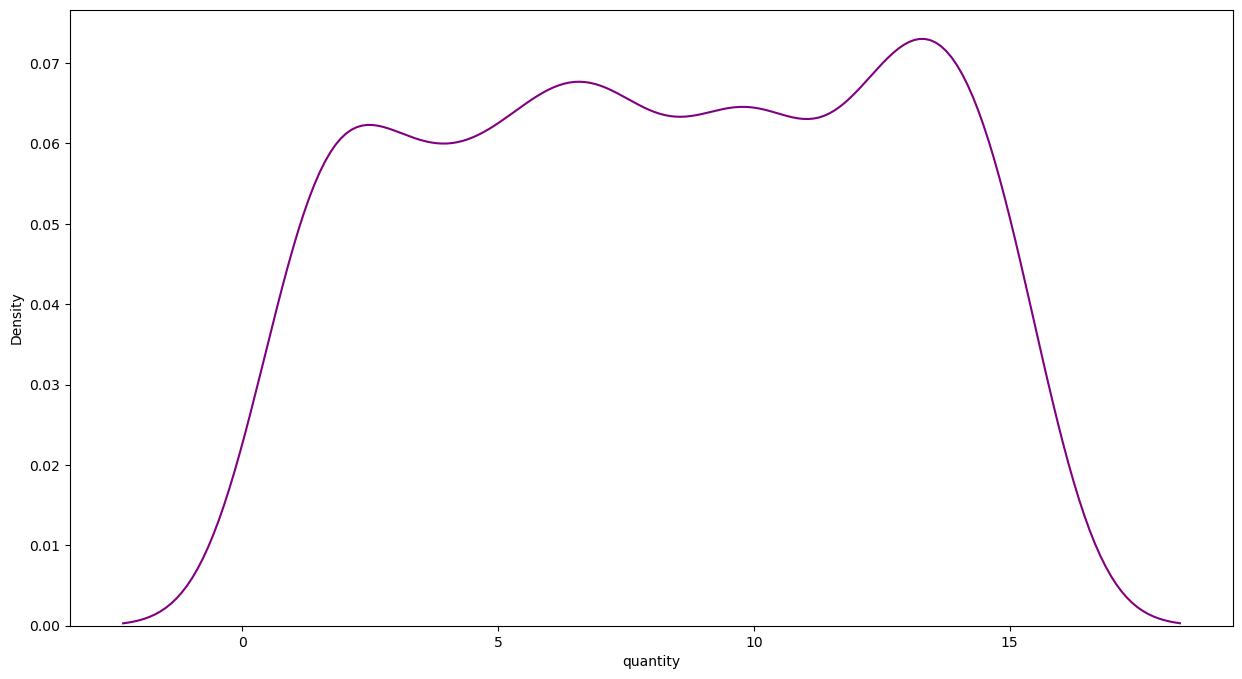

In [100]:
#without histogram
sns.distplot(df['quantity'],color='purple',hist=False)
plt.show()

In [102]:
#kdeplot

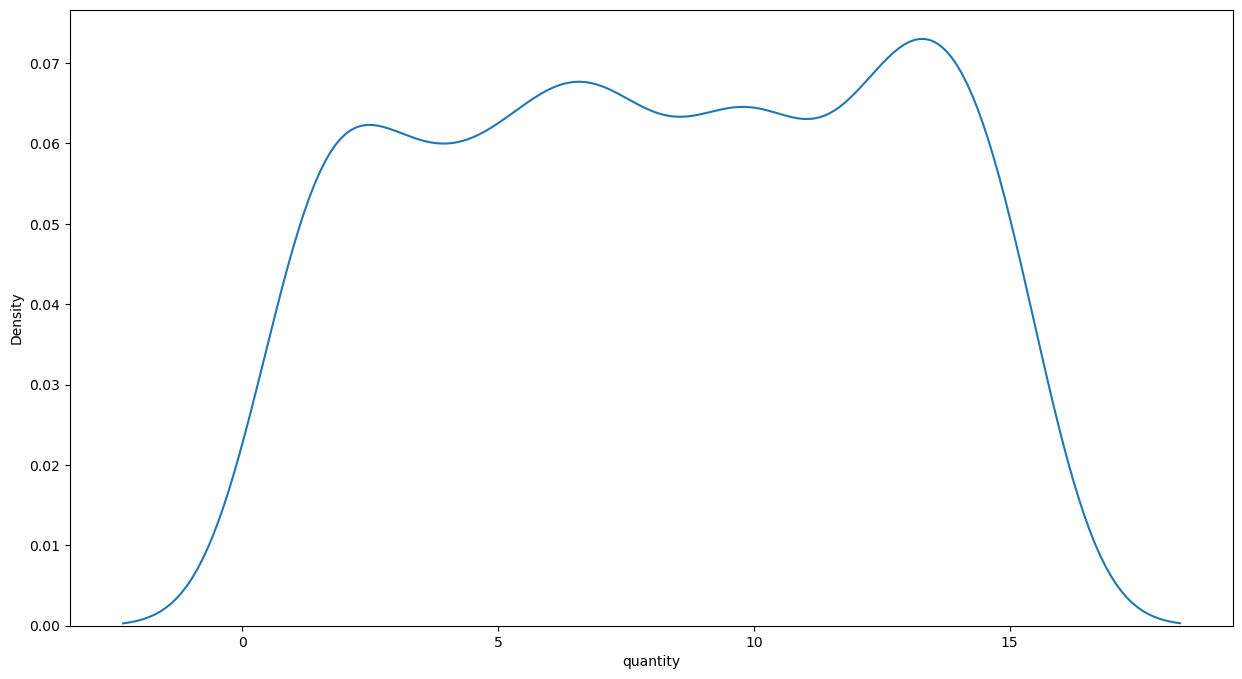

In [103]:
sns.kdeplot(df['quantity'])
plt.show()

In [105]:
#box plot

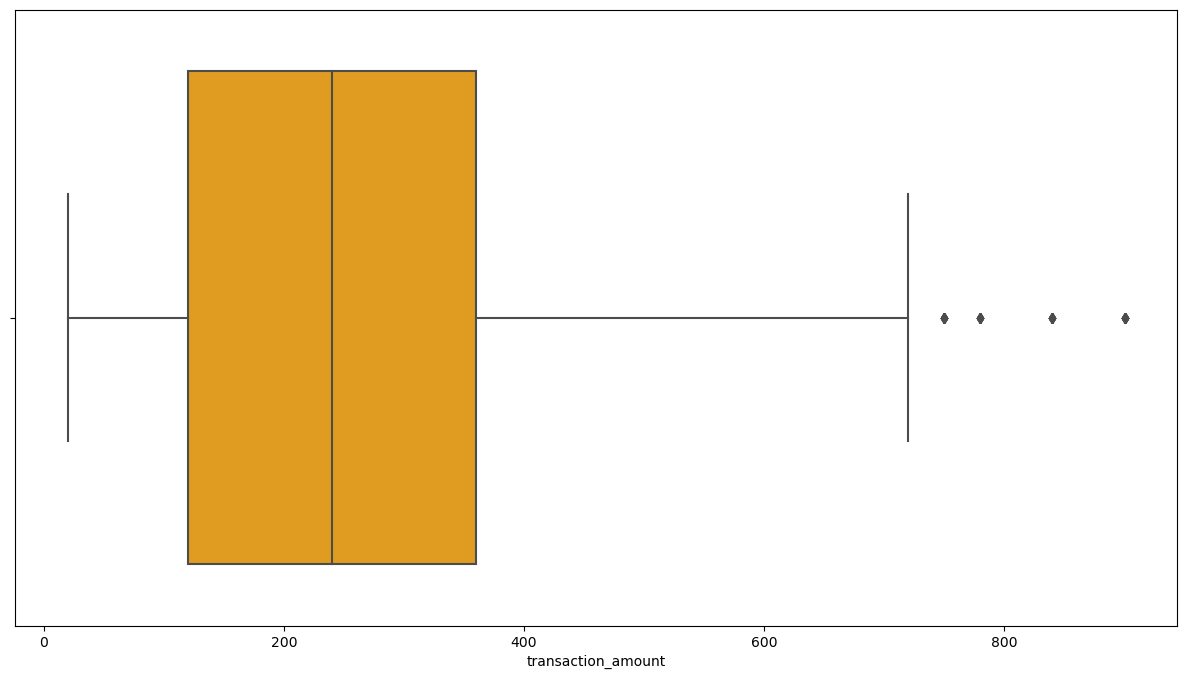

In [111]:
sns.boxplot(x=df['transaction_amount'],color='orange')
plt.show()

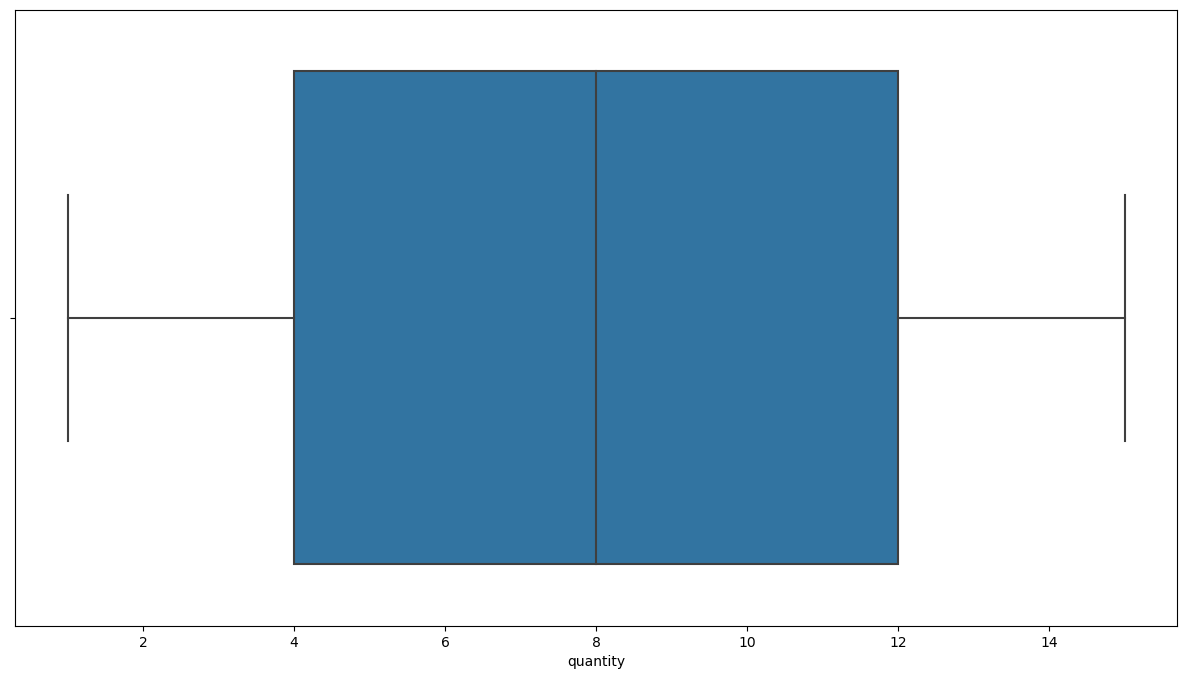

In [109]:
sns.boxplot(x=df['quantity'])
plt.show()

In [ ]:
#Plotting subplots for numerical columns with histplot, distplot, kdeplot & boxplot

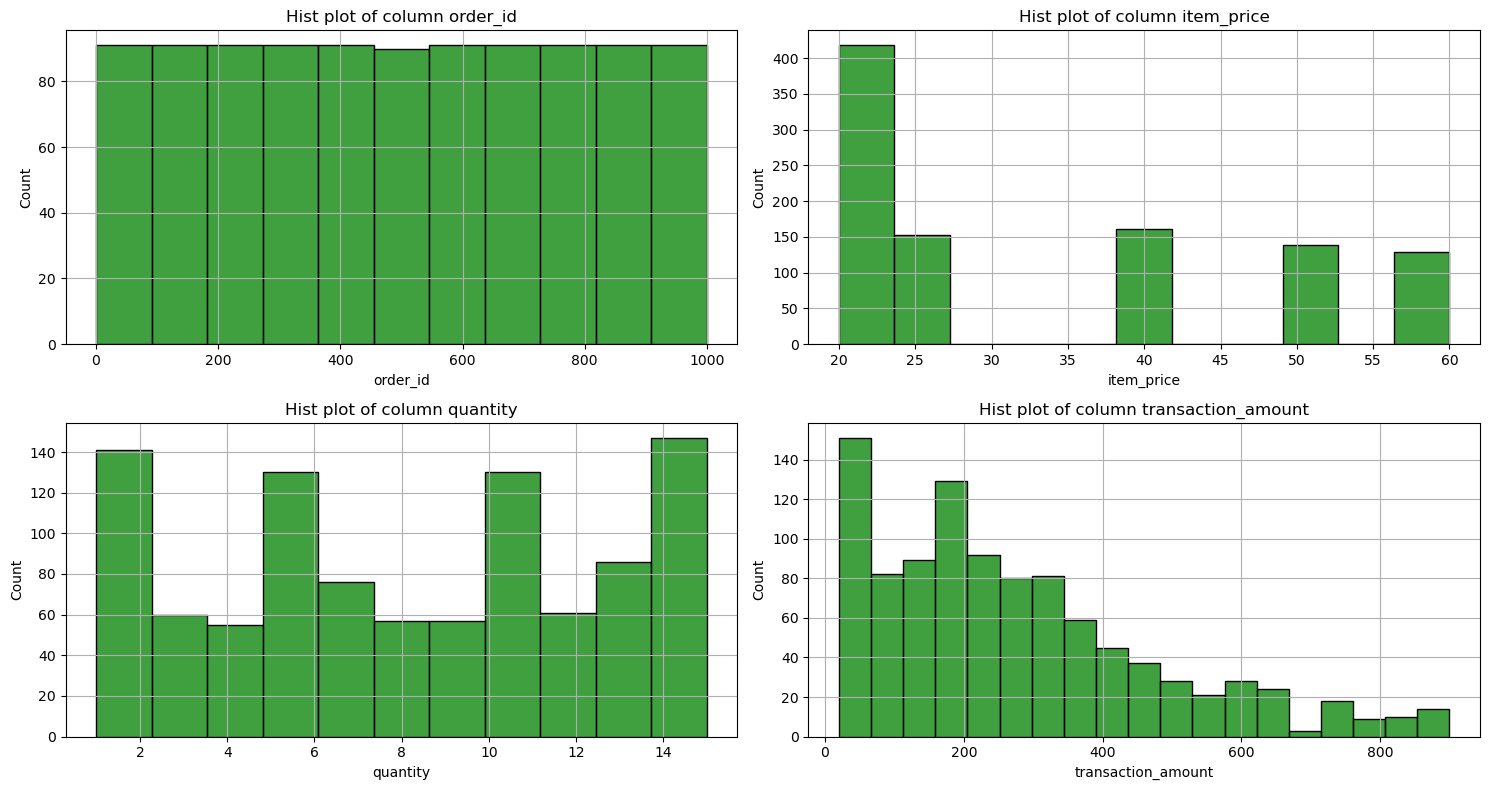

In [119]:
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.histplot(df[i],color='green')
    plt.title(f'Hist plot of column {i}')
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

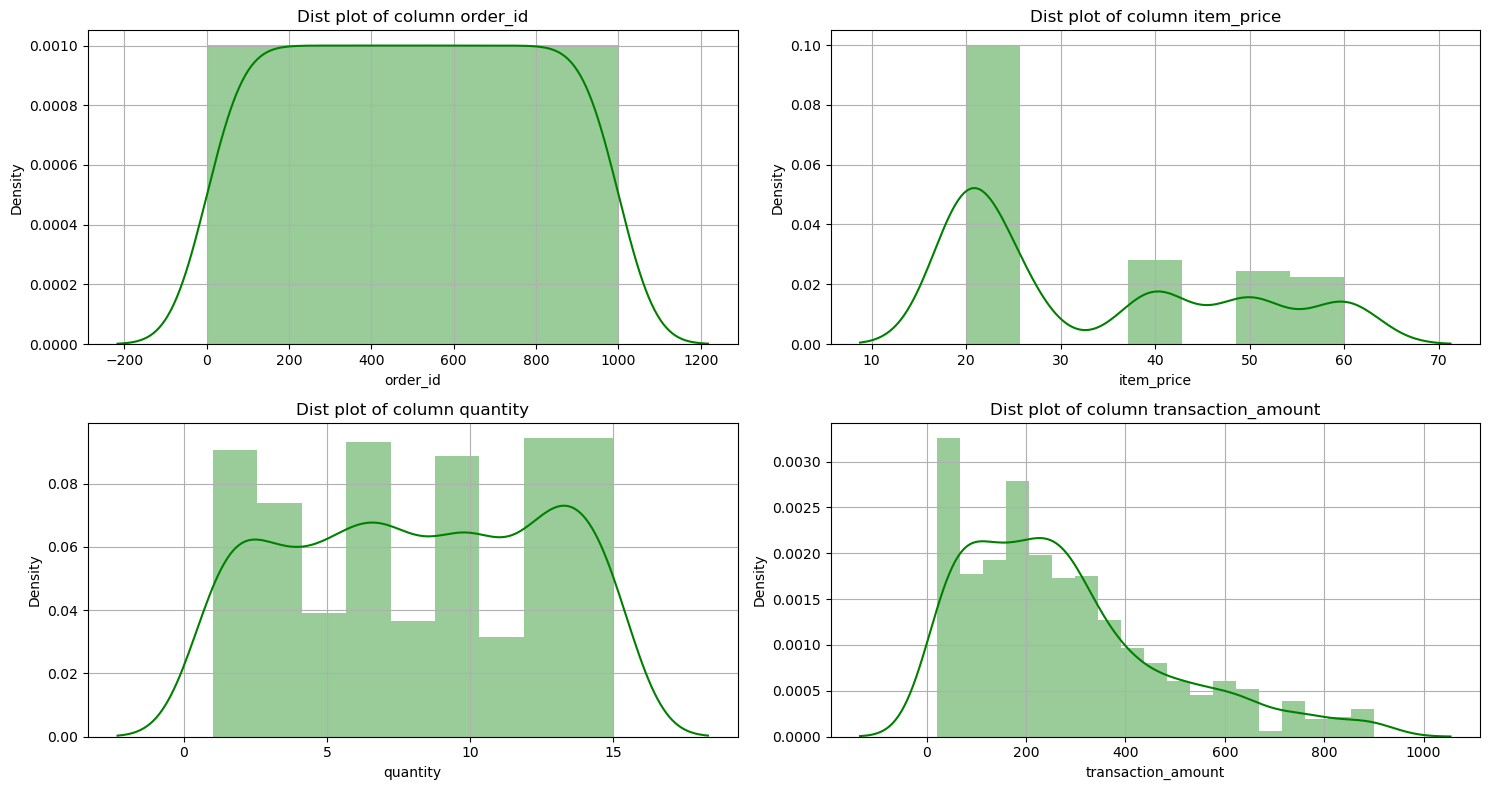

In [120]:
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.distplot(df[i],color='green')
    plt.title(f'Dist plot of column {i}')
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

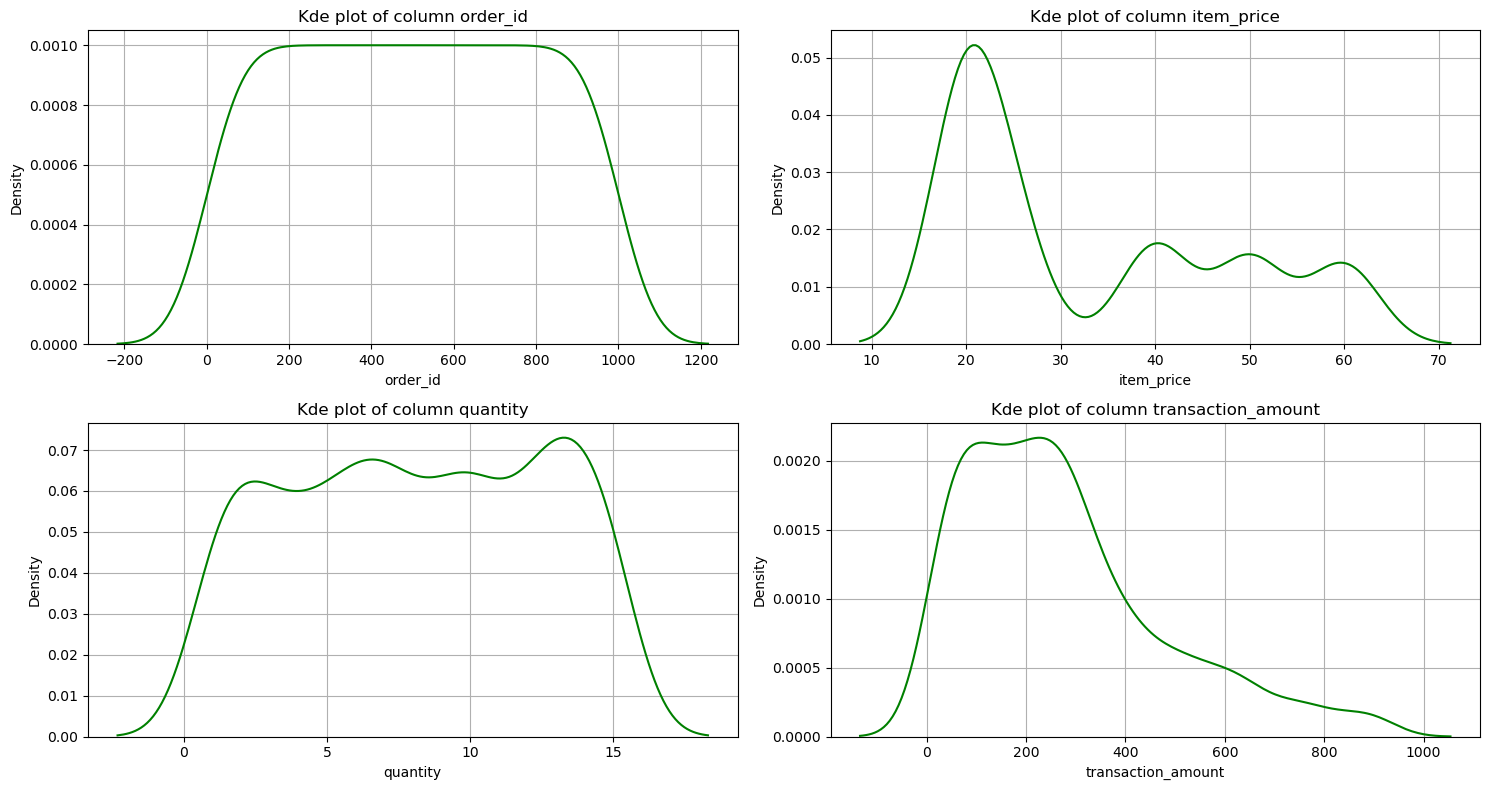

In [121]:
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.kdeplot(df[i],color='green')
    plt.title(f'Kde plot of column {i}')
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

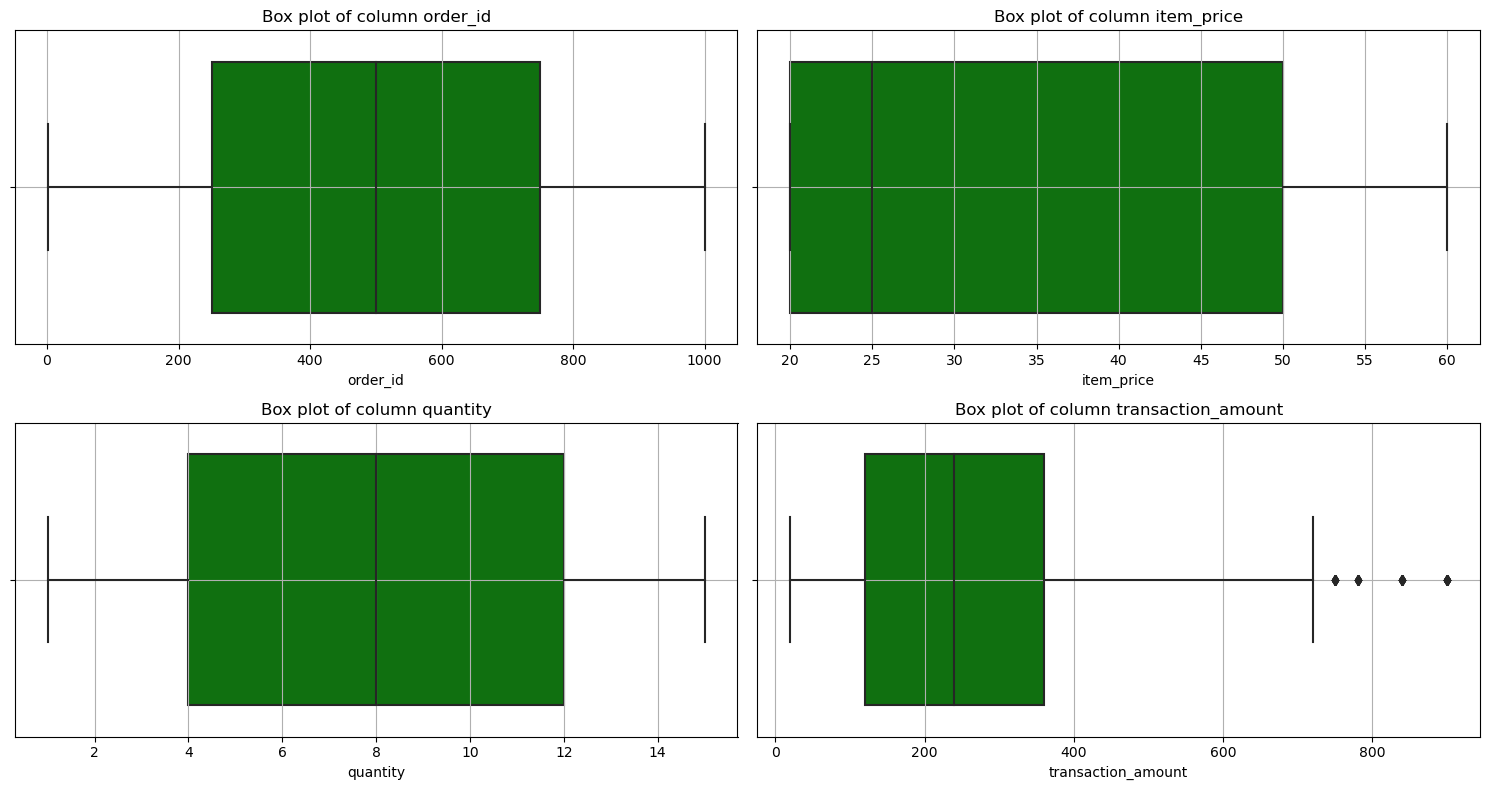

In [122]:
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(x=df[i],color='green')
    plt.title(f'Box plot of column {i}')
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

In [123]:
#Bivariate Visualisation

In [124]:
#Numeric vs numeric

In [125]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

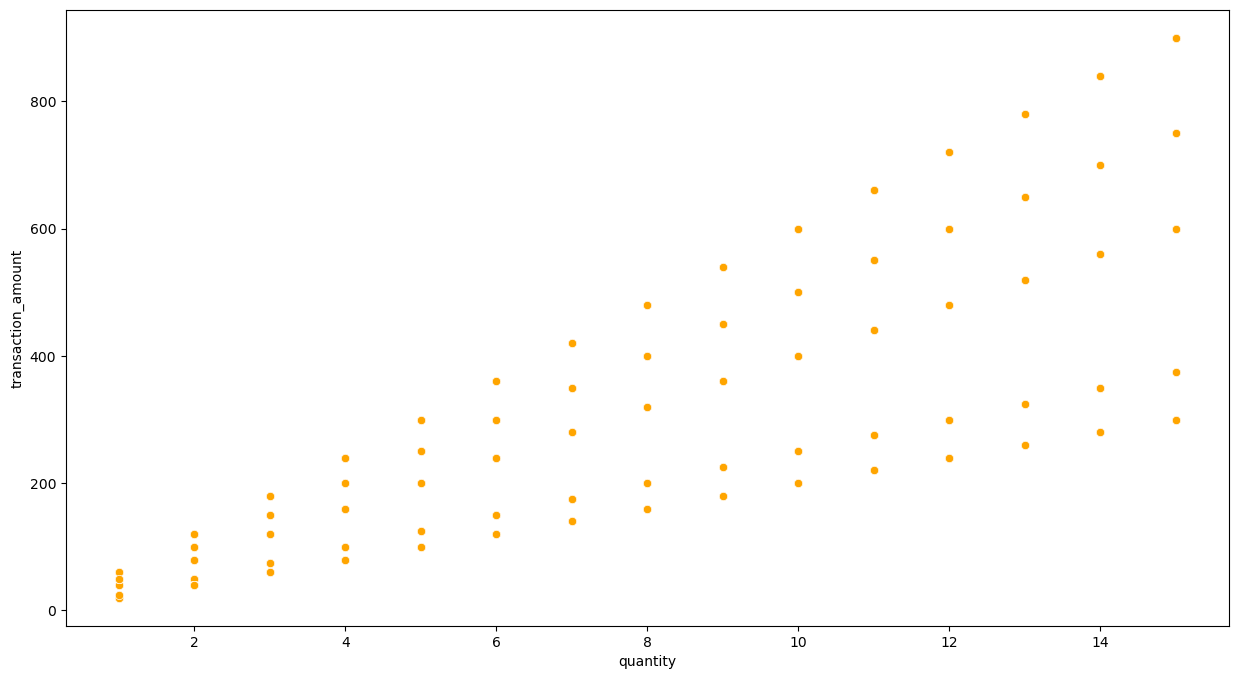

In [127]:
#using seaborn library
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],color='orange')
plt.show()

There is an increasing trend between the variables. Which means there is a positive correlation between the variables.

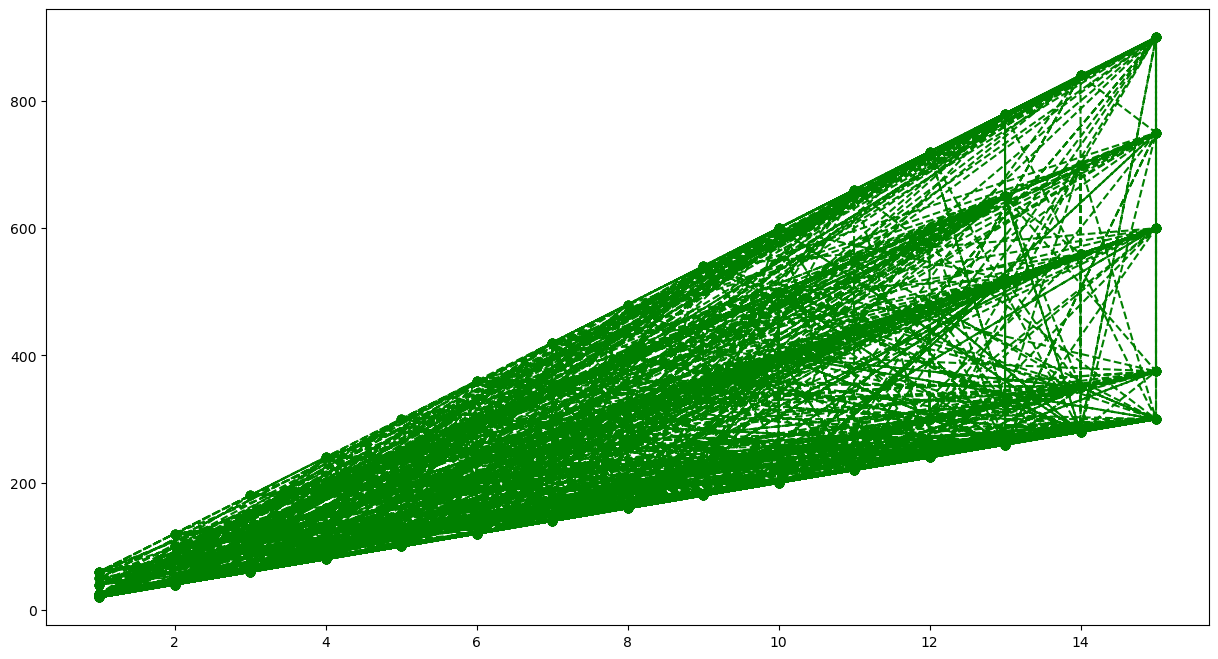

In [129]:
#using matplotlib library
plt.plot(df['quantity'],df['transaction_amount'],'go',linestyle='--')
plt.show()

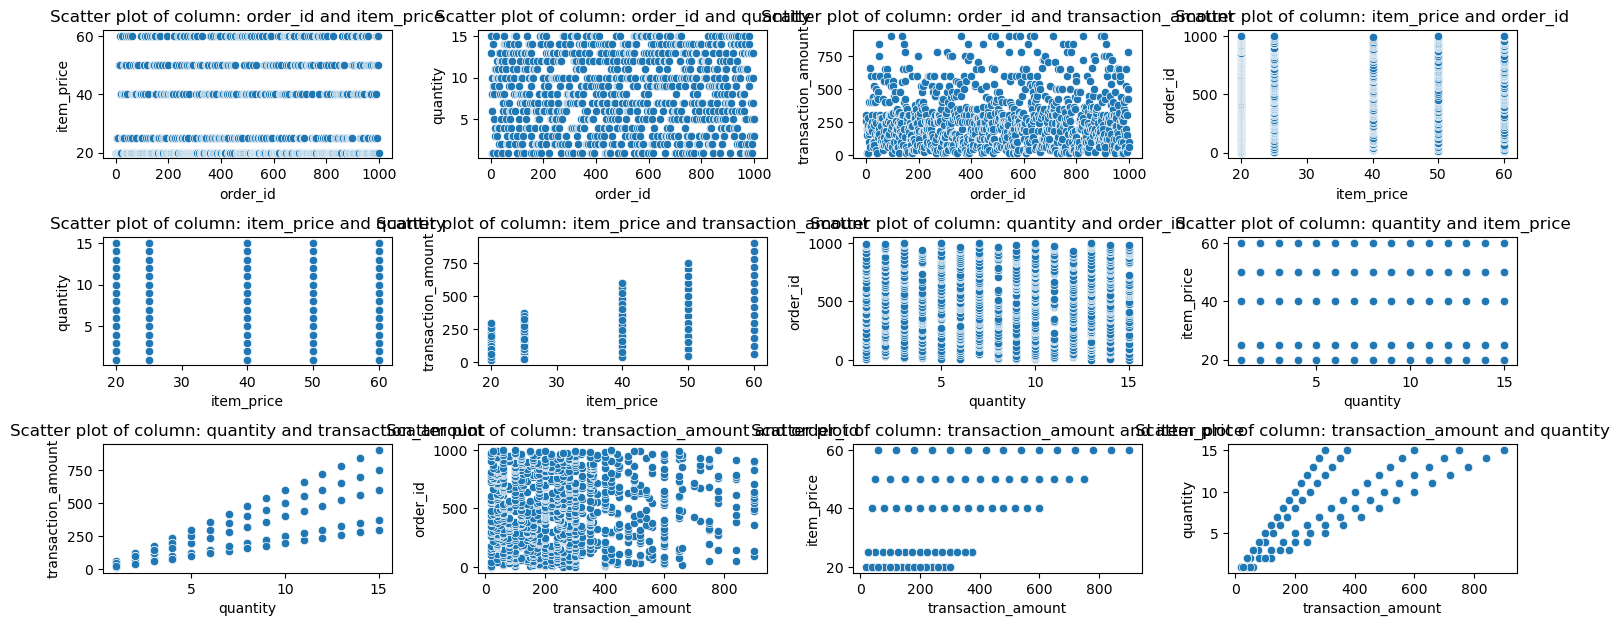

In [133]:
t=1
for i in num:
    for j in num:
        if i != j:
            plt.subplot(4,4,t)
            sns.scatterplot(x=df[i],y=df[j])
            t+=1
            plt.title(f'Scatter plot of column: {i} and {j}')
plt.tight_layout()
plt.show()

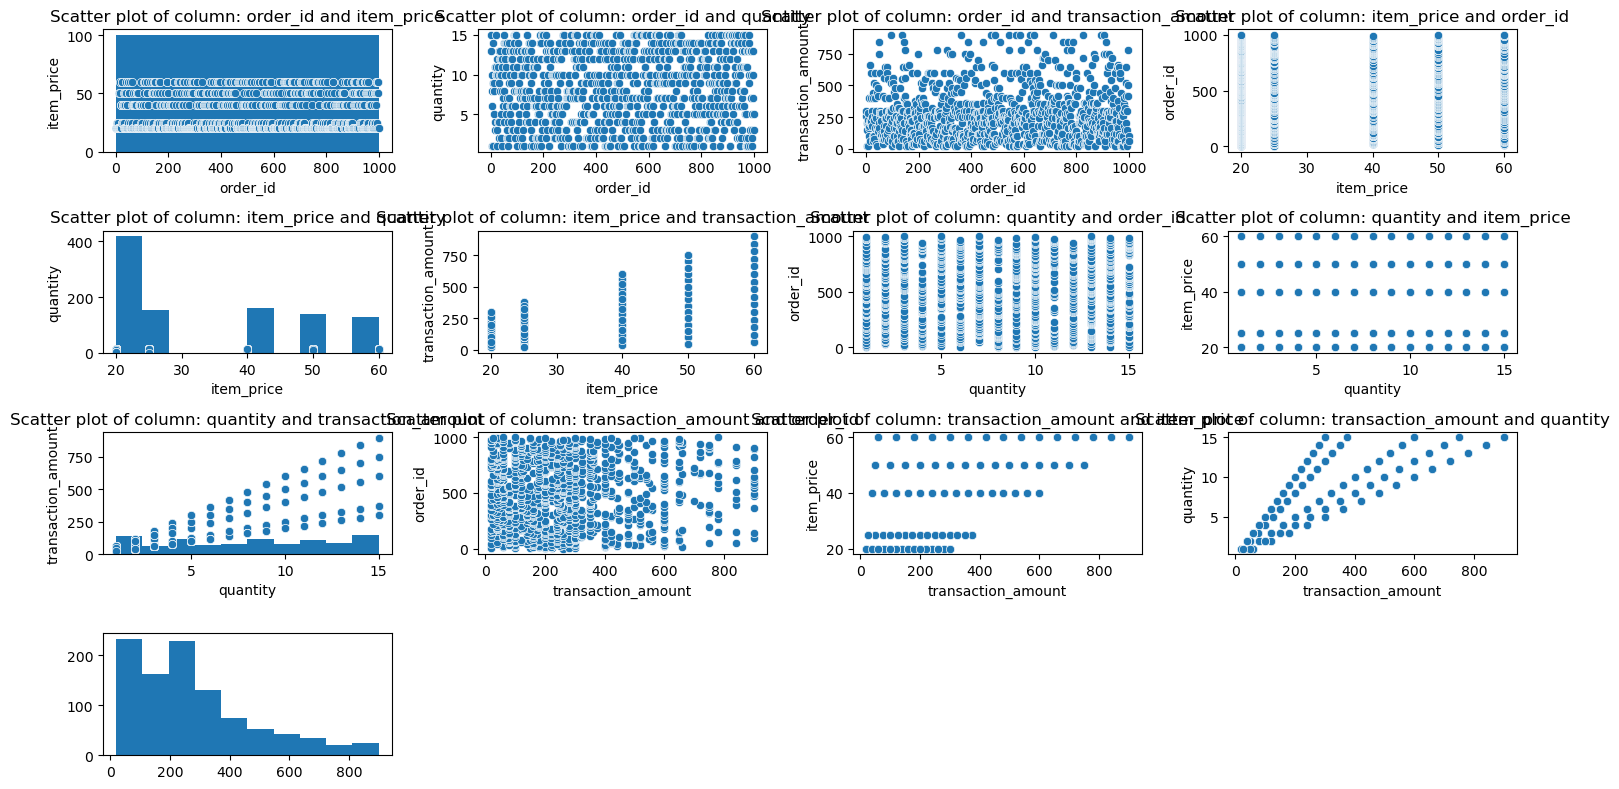

In [138]:
t=1
for i in num:
    for j in num:
        plt.subplot(4,4,t)
        if i != j:
            sns.scatterplot(x=df[i],y=df[j])
            t+=1
            plt.title(f'Scatter plot of column: {i} and {j}')
        else:
            plt.hist(df[i])
plt.tight_layout()
plt.show()

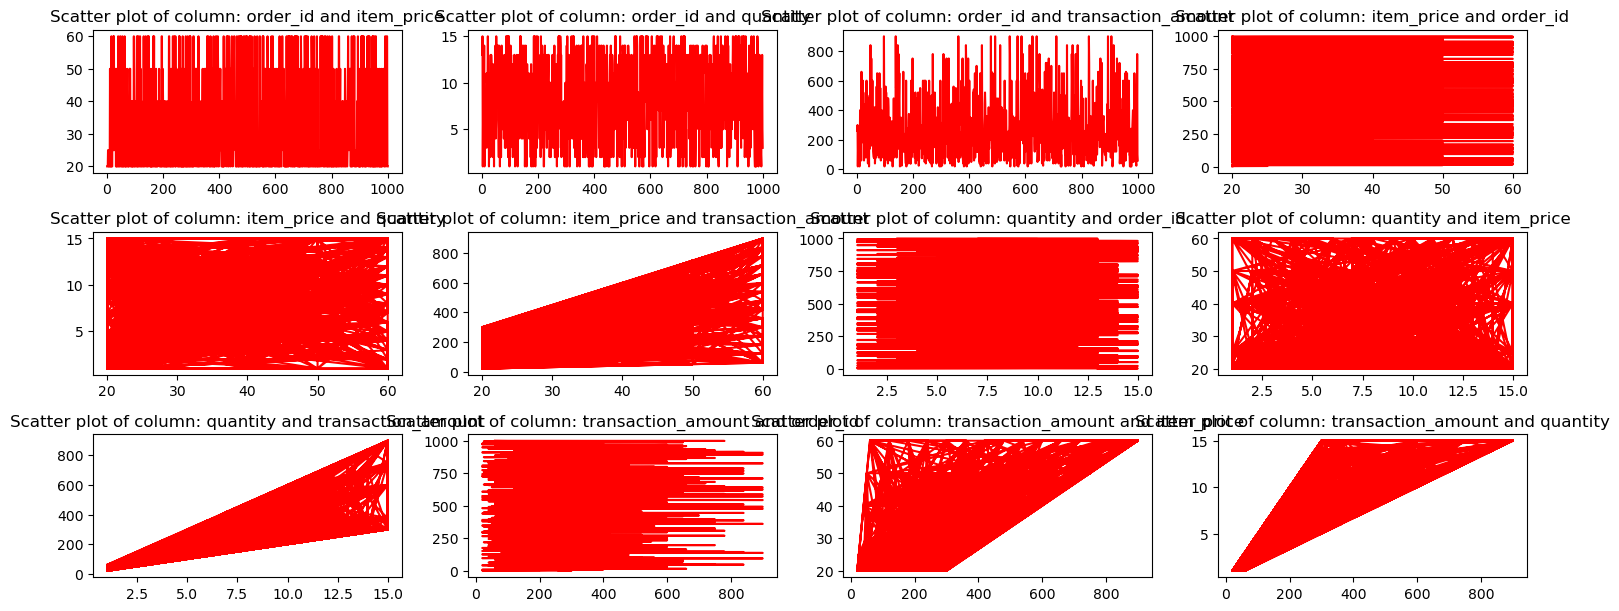

In [136]:
t=1
for i in num:
    for j in num:
        if i != j:
            plt.subplot(4,4,t)
            plt.plot(df[i],df[j],color='red')
            t+=1
            plt.title(f'Scatter plot of column: {i} and {j}')
plt.tight_layout()
plt.show()

In [139]:
#Numerical & Categorical

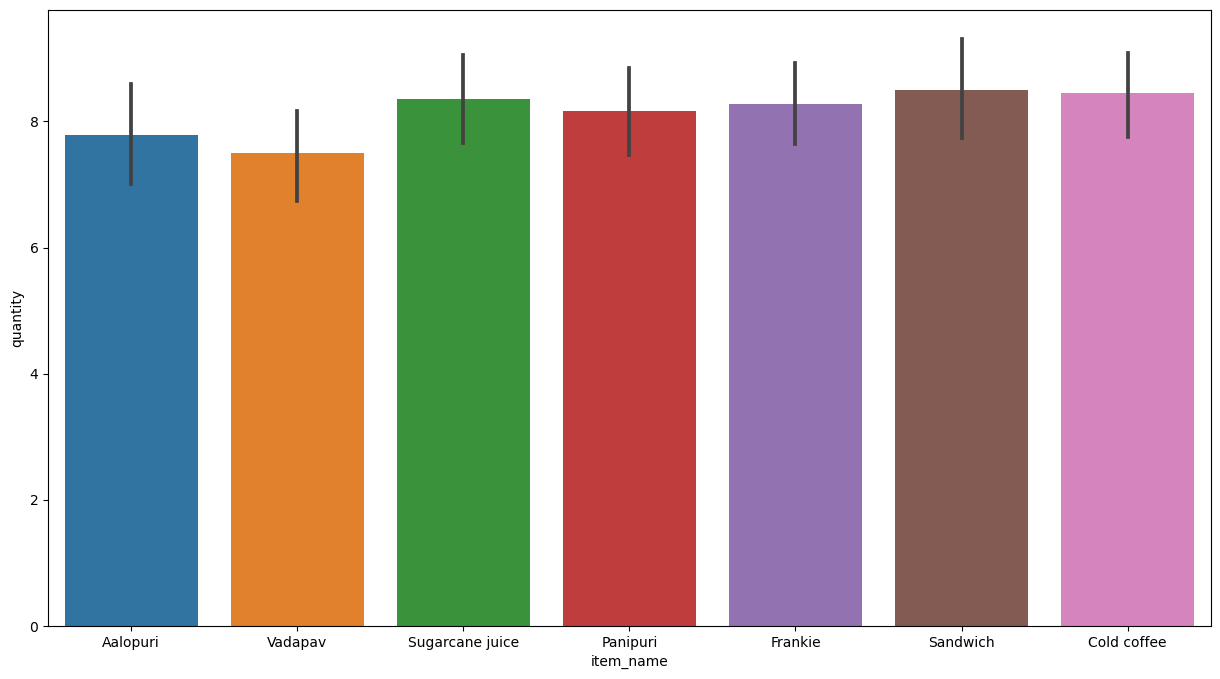

In [141]:
sns.barplot(x=df['item_name'],y=df['quantity'])
plt.show()

In [142]:
df.groupby(by=['item_name'])[['quantity']].mean()

,quantity
item_name,
Aalopuri,7.791045
Cold coffee,8.453416
Frankie,8.273381
Panipuri,8.173333
Sandwich,8.503876
Sugarcane juice,8.352941
Vadapav,7.507463


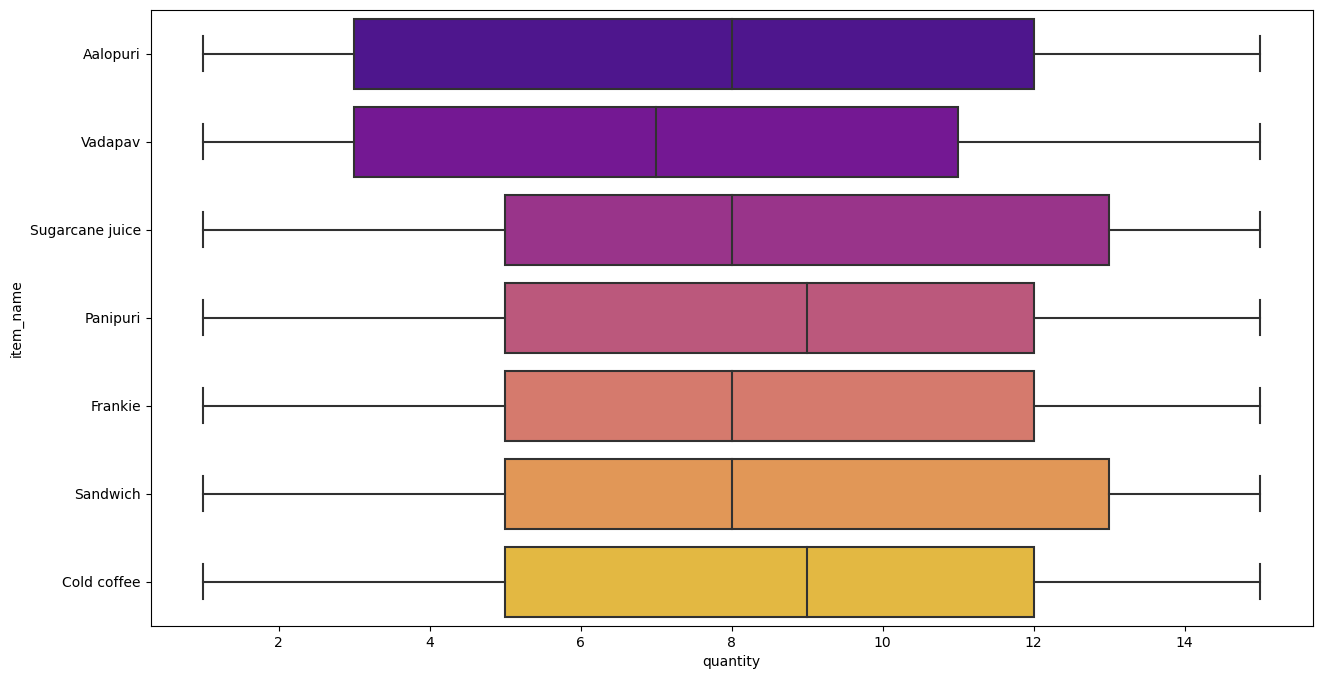

In [146]:
sns.boxplot(x=df['quantity'],y=df['item_name'],palette='plasma')
plt.show()

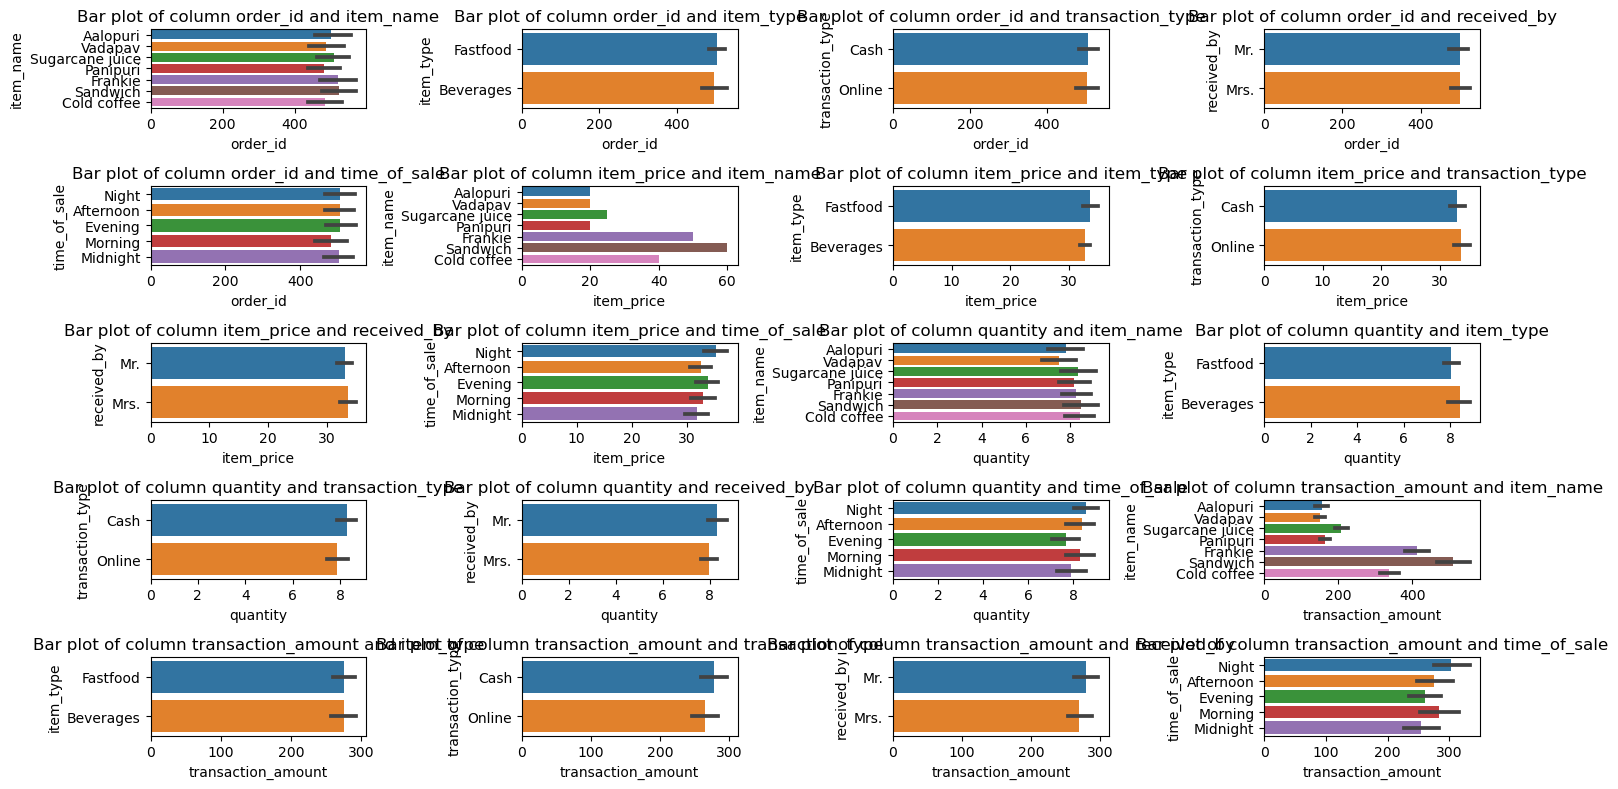

In [148]:
t = 1
for i in num:
    for j in cat:
        plt.subplot(5,4,t)
        sns.barplot(x=df[i],y=df[j])
        plt.title(f'Bar plot of column {i} and {j}')
        t+=1
plt.tight_layout()
plt.show()

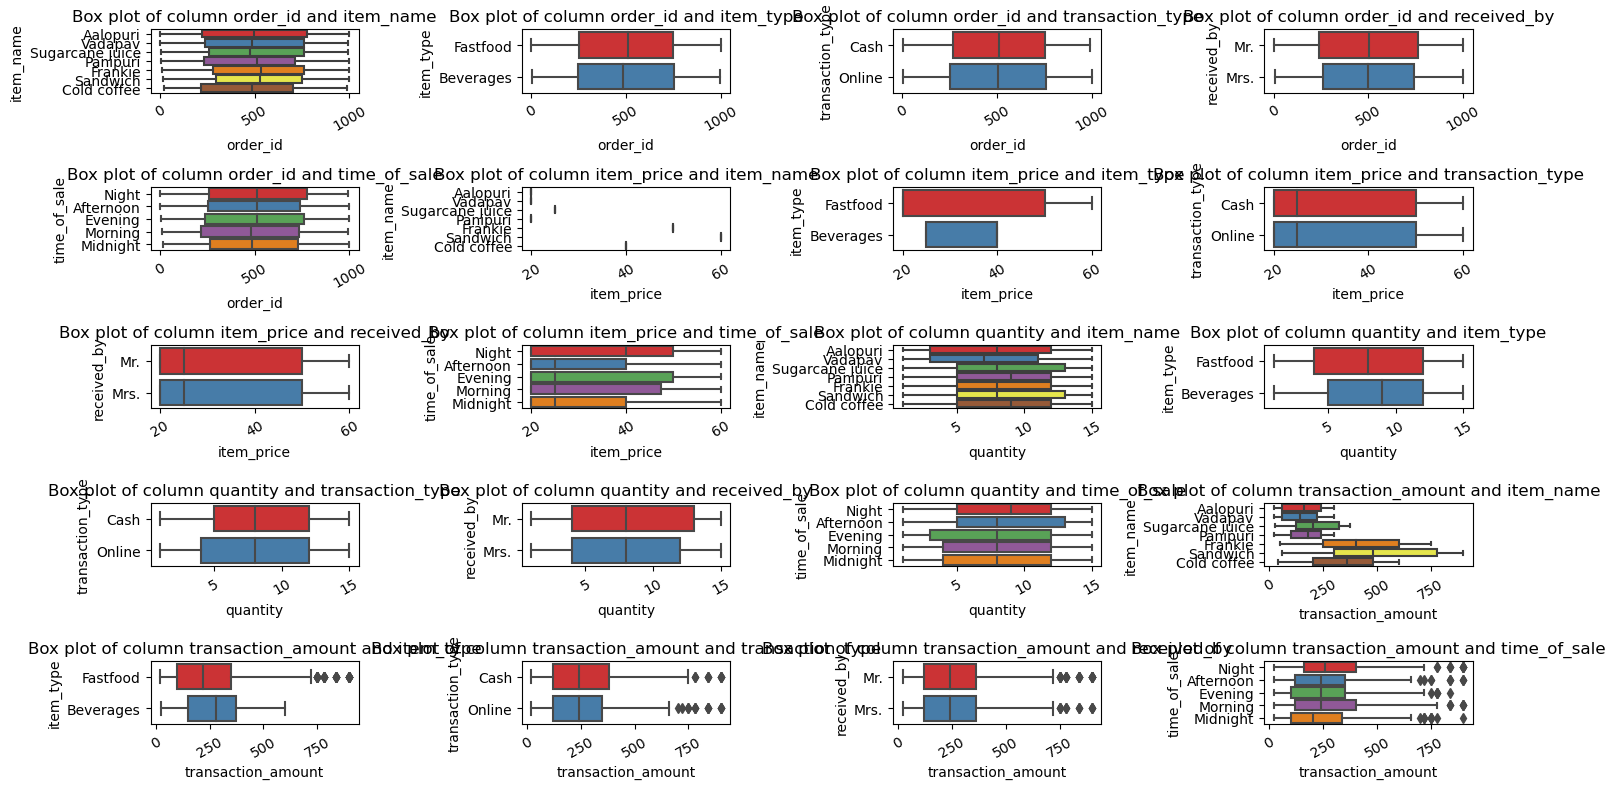

In [152]:
t=1
for i in num:
    for j in cat:
        plt.subplot(5,4,t)
        sns.boxplot(x=df[i],y=df[j],palette='Set1')
        plt.xticks(rotation=30)
        plt.title(f'Box plot of column {i} and {j}')
        t+=1
plt.tight_layout()
plt.show()

In [153]:
#Cat vs Cat

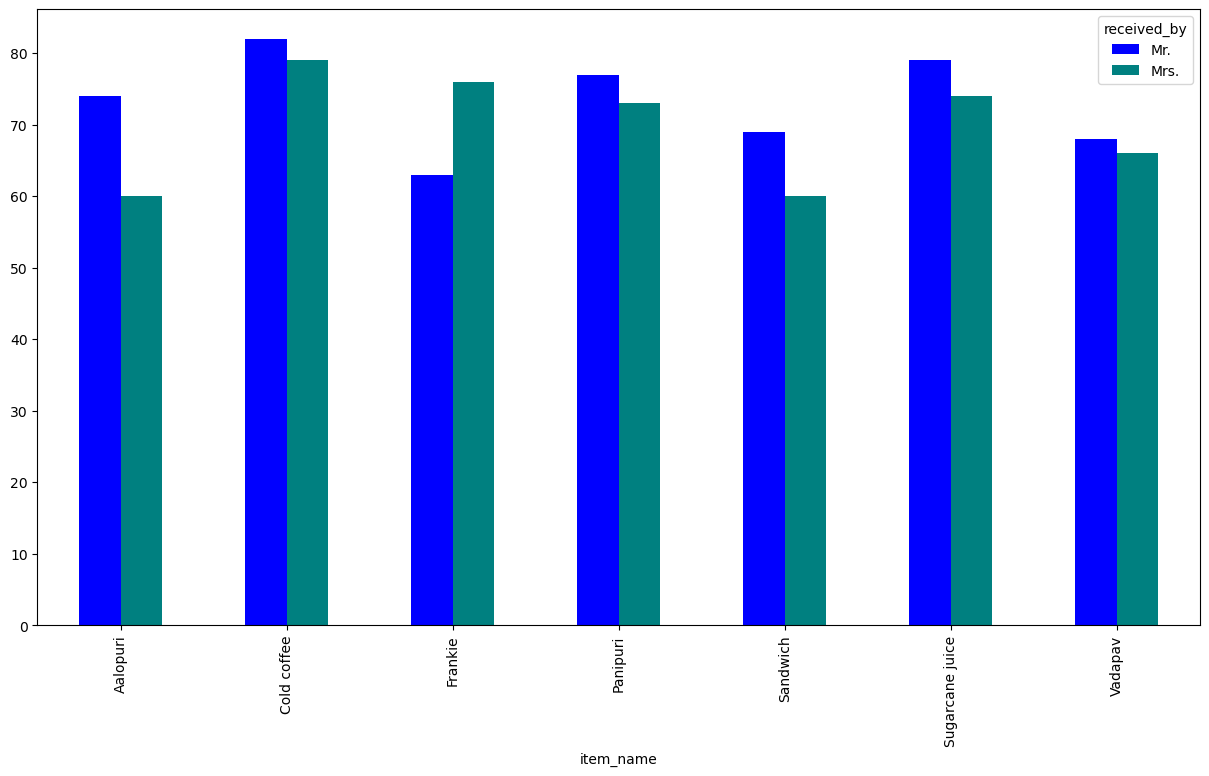

In [163]:
pd.crosstab(df['item_name'],df['received_by']).plot(kind='bar',color=['blue','teal'])
plt.show()

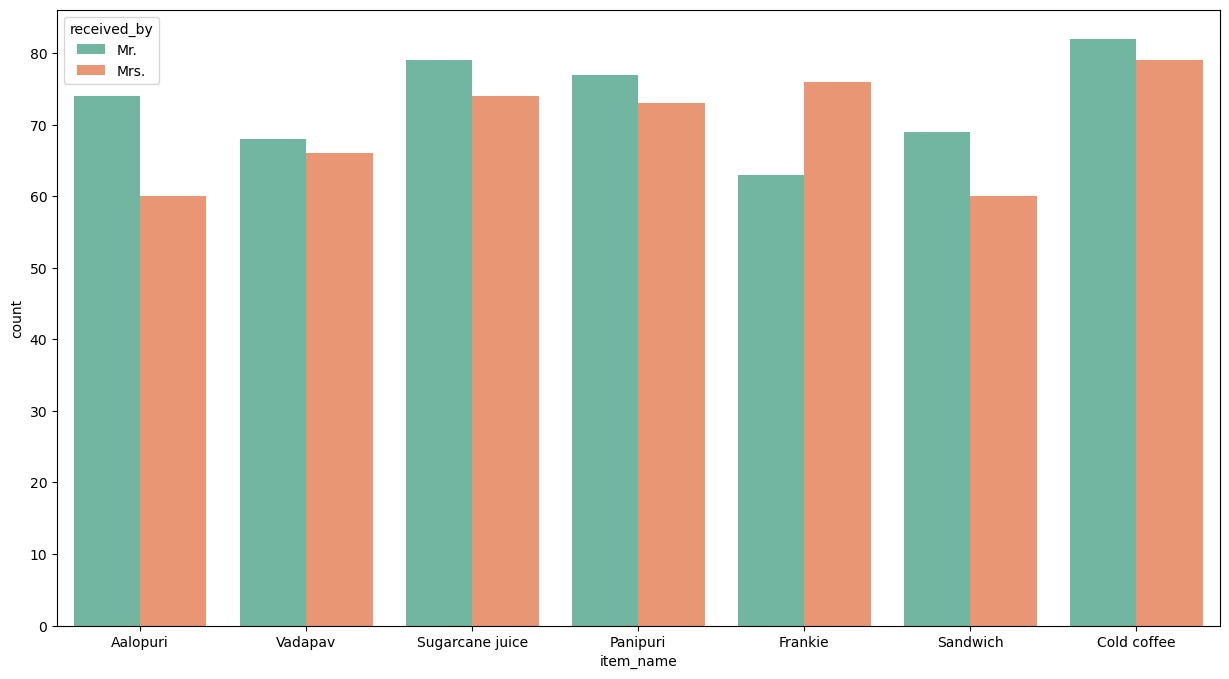

In [167]:
sns.countplot(x=df['item_name'],hue=df['received_by'],palette='Set2')
plt.show()

In [169]:
#num vs num vs cat

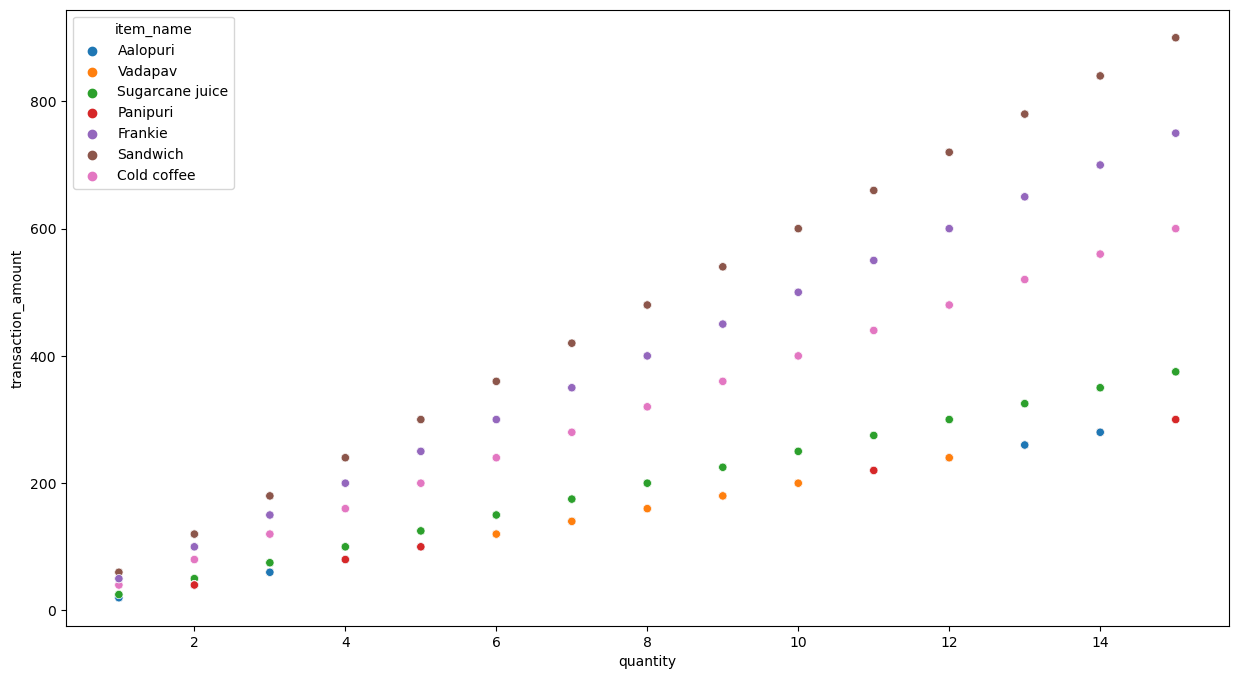

In [170]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],hue=df['item_name'])
plt.show()

In [171]:
#num vs cat vs cat

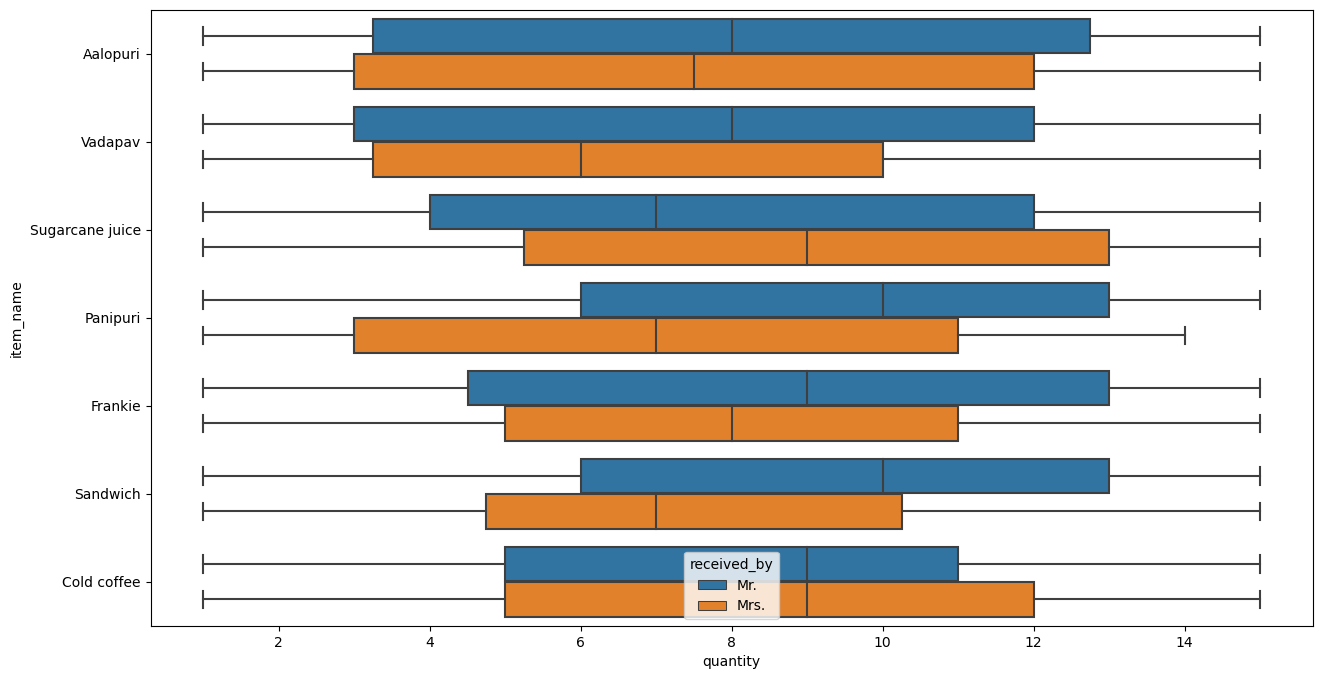

In [172]:
sns.boxplot(x=df['quantity'],y=df['item_name'],hue=df['received_by'])
plt.show()

In [173]:
#Heatmap

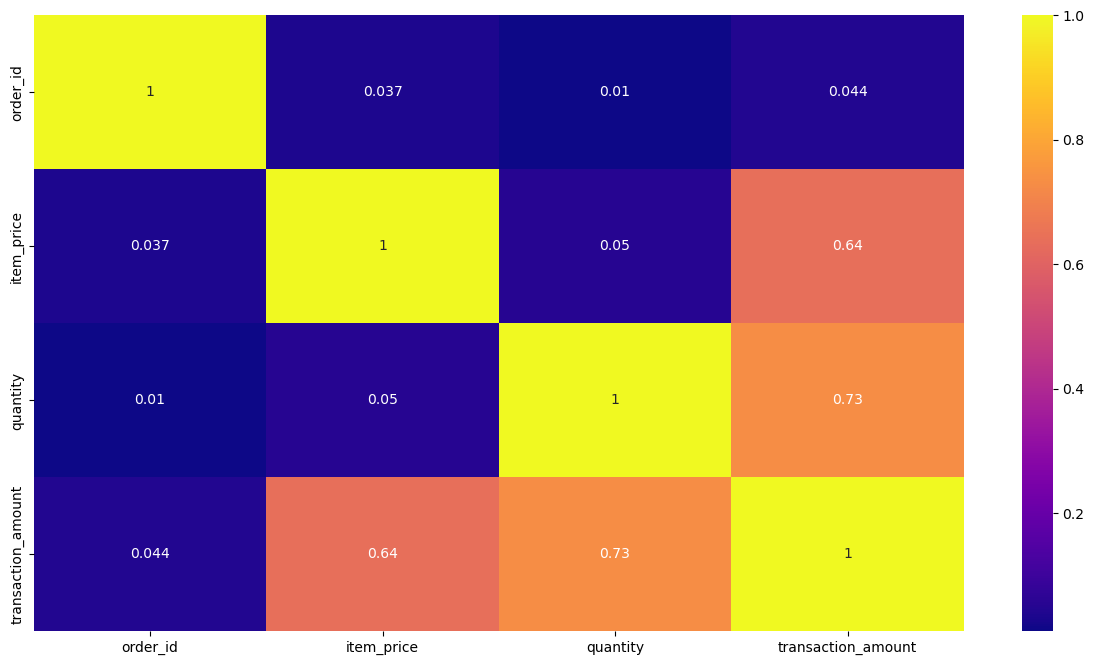

In [178]:
sns.heatmap(df[num].corr(),annot=True,cmap='plasma')
plt.show()

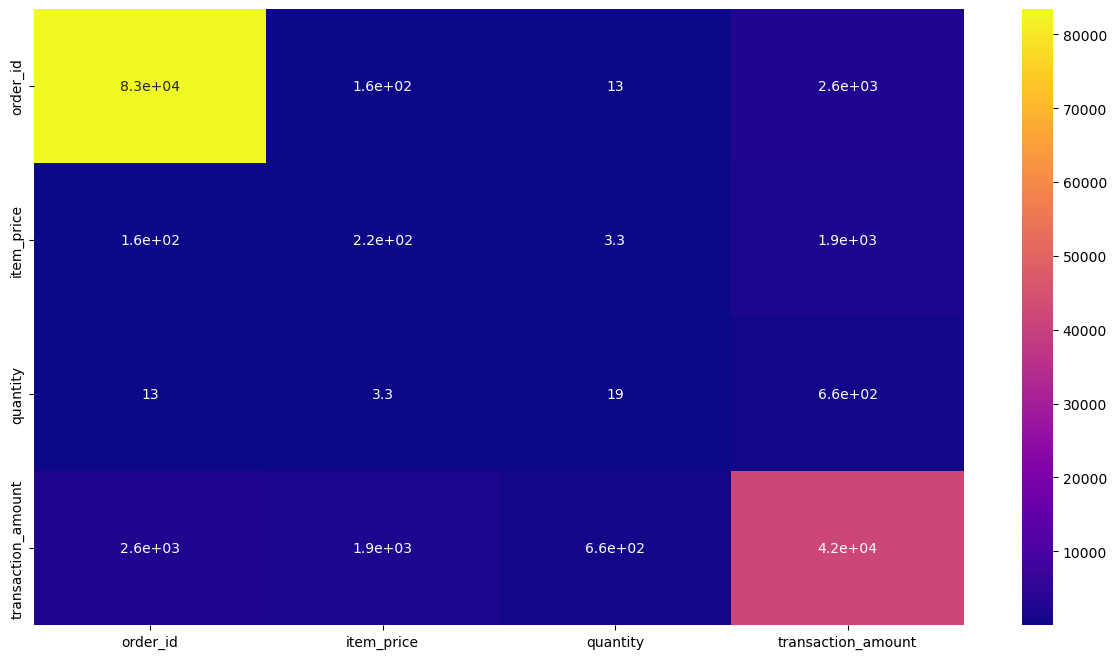

In [181]:
sns.heatmap(df[num].cov(),annot=True,cmap='plasma')
plt.show()

<Axes: >

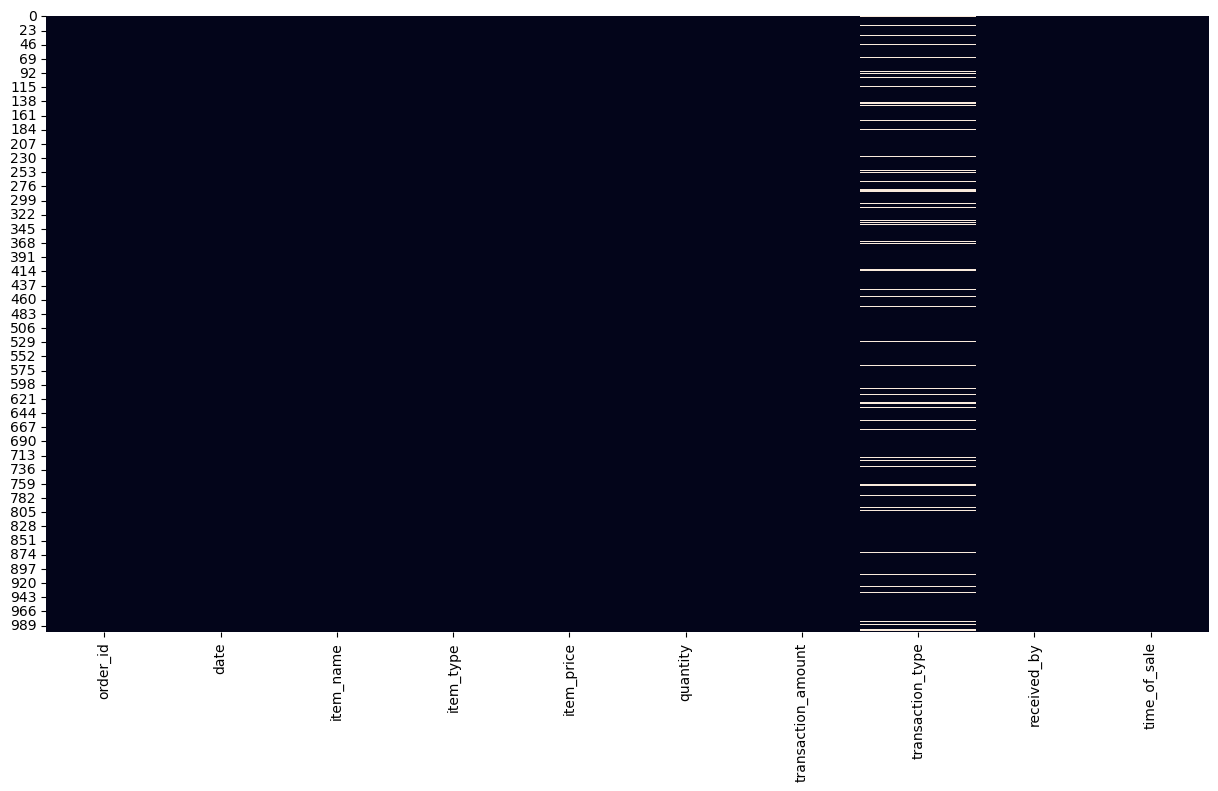

In [183]:
#visualising null values using heatmap
sns.heatmap(df.isnull(),cbar=False)

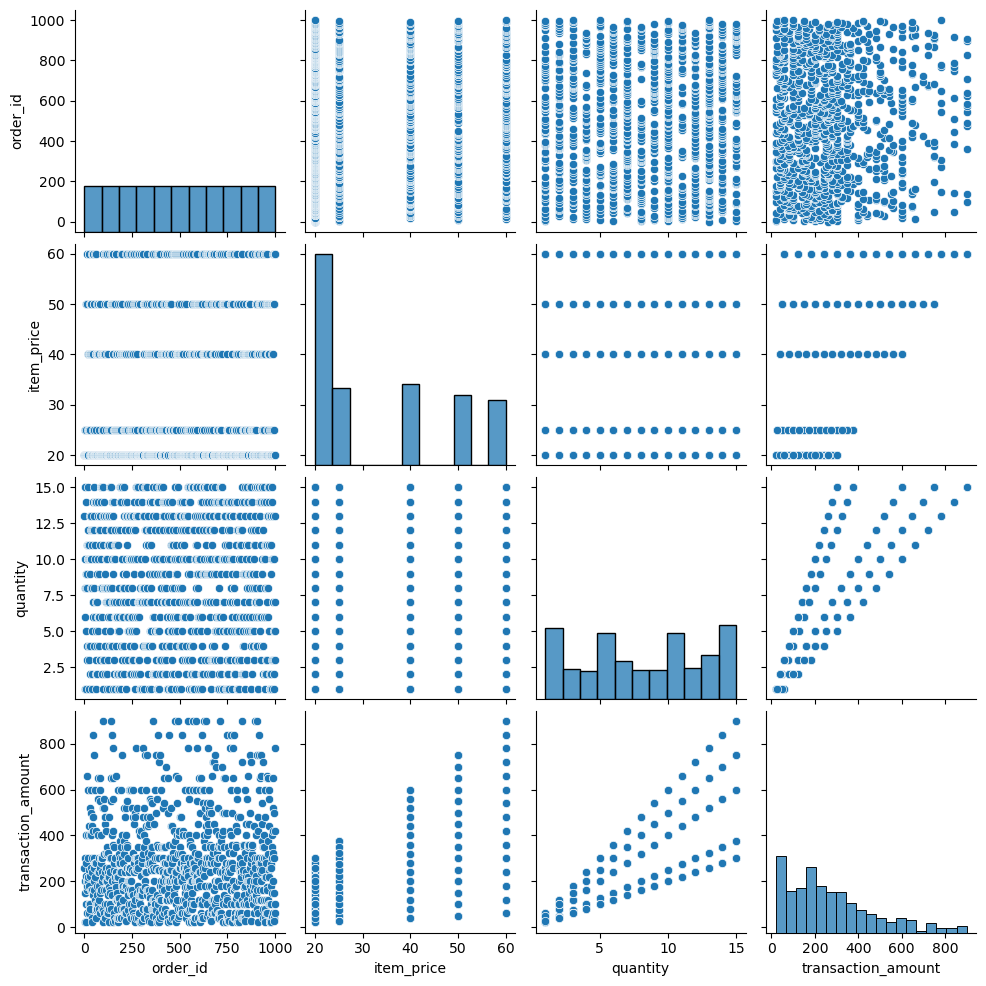

In [184]:
#frequency in bins, scatter plot
sns.pairplot(df)
plt.show()

In [185]:
#Other plots for visualisation

In [186]:
#Line plot

In [187]:
x=np.linspace(1,20,100)
x

array([ 1.        ,  1.19191919,  1.38383838,  1.57575758,  1.76767677,
        1.95959596,  2.15151515,  2.34343434,  2.53535354,  2.72727273,
        2.91919192,  3.11111111,  3.3030303 ,  3.49494949,  3.68686869,
        3.87878788,  4.07070707,  4.26262626,  4.45454545,  4.64646465,
        4.83838384,  5.03030303,  5.22222222,  5.41414141,  5.60606061,
        5.7979798 ,  5.98989899,  6.18181818,  6.37373737,  6.56565657,
        6.75757576,  6.94949495,  7.14141414,  7.33333333,  7.52525253,
        7.71717172,  7.90909091,  8.1010101 ,  8.29292929,  8.48484848,
        8.67676768,  8.86868687,  9.06060606,  9.25252525,  9.44444444,
        9.63636364,  9.82828283, 10.02020202, 10.21212121, 10.4040404 ,
       10.5959596 , 10.78787879, 10.97979798, 11.17171717, 11.36363636,
       11.55555556, 11.74747475, 11.93939394, 12.13131313, 12.32323232,
       12.51515152, 12.70707071, 12.8989899 , 13.09090909, 13.28282828,
       13.47474747, 13.66666667, 13.85858586, 14.05050505, 14.24

In [192]:
y= np.log(x)
y

array([0.        , 0.17556477, 0.32486108, 0.45473616, 0.56966612,
       0.67273831, 0.76617232, 0.85161752, 0.93033309, 1.00330211,
       1.07130684, 1.13497993, 1.19484032, 1.25131892, 1.3047775 ,
       1.3555227 , 1.40381671, 1.44988546, 1.49392503, 1.53610664,
       1.57658075, 1.61548023, 1.65292302, 1.68901431, 1.72384826,
       1.75750955, 1.79007455, 1.82161243, 1.85218601, 1.88185251,
       1.91066421, 1.93866899, 1.96591082, 1.99243016, 2.01826437,
       2.04344794, 2.06801285, 2.09198876, 2.11540326, 2.13828204,
       2.16064907, 2.18252674, 2.20393601, 2.22489651, 2.24542668,
       2.26554382, 2.28526423, 2.30460326, 2.32357537, 2.34219423,
       2.36047276, 2.37842317, 2.39605704, 2.41338533, 2.43041846,
       2.44716632, 2.4636383 , 2.47984335, 2.49578997, 2.51148629,
       2.52694003, 2.54215859, 2.55714901, 2.57191803, 2.58647209,
       2.60081738, 2.61495978, 2.62890496, 2.64265834, 2.65622513,
       2.66961033, 2.68281872, 2.69585493, 2.70872338, 2.72142

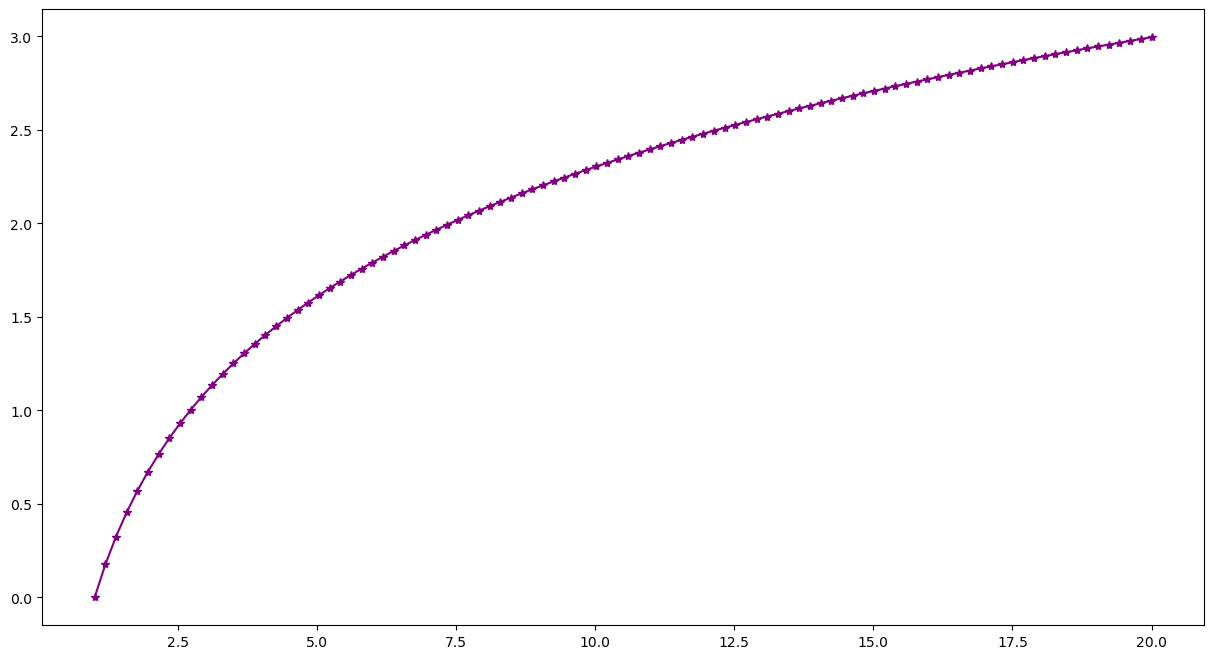

In [196]:
plt.plot(x,y,marker='*',color='purple')

In [197]:
#Violin plot

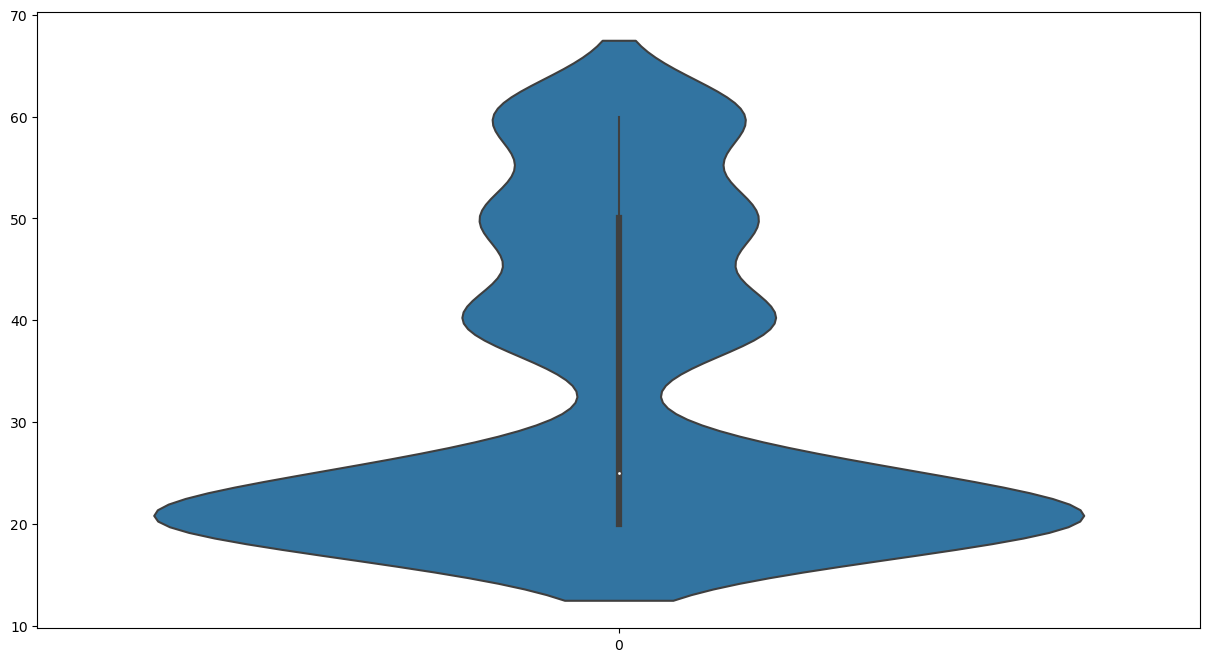

In [200]:
sns.violinplot(df['item_price'])
plt.show()

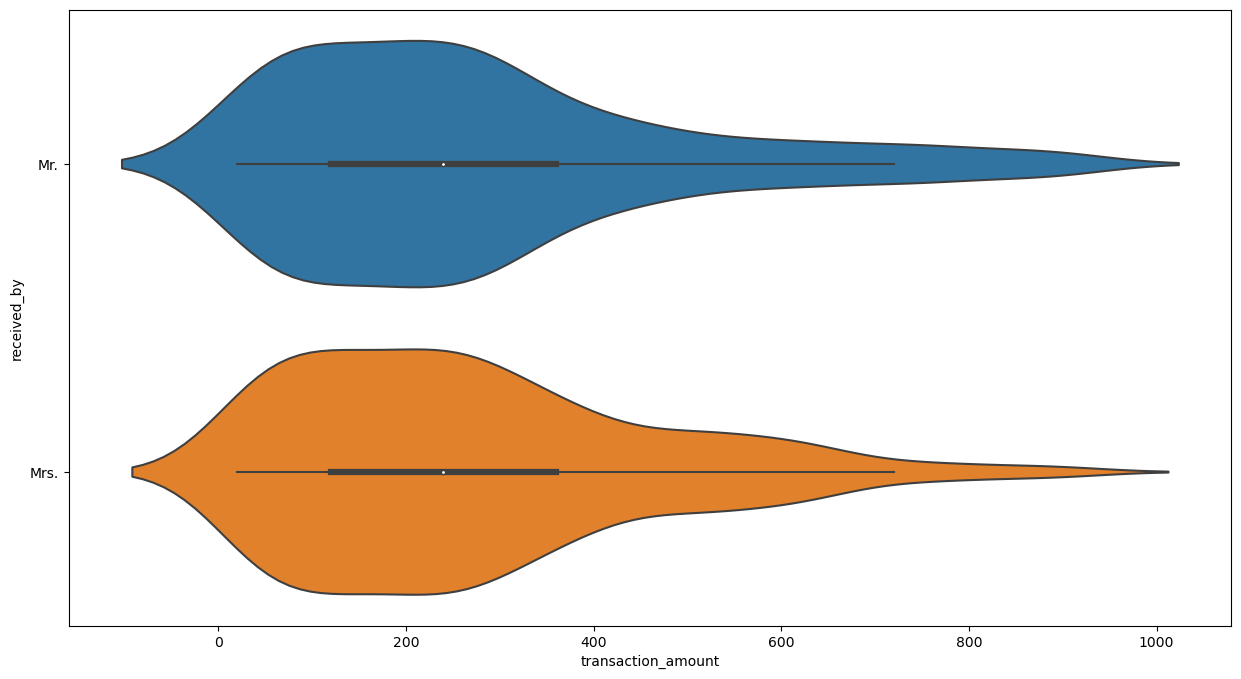

In [202]:
sns.violinplot(x=df['transaction_amount'],y=df['received_by'])
plt.show()

In [201]:
#swarmplot

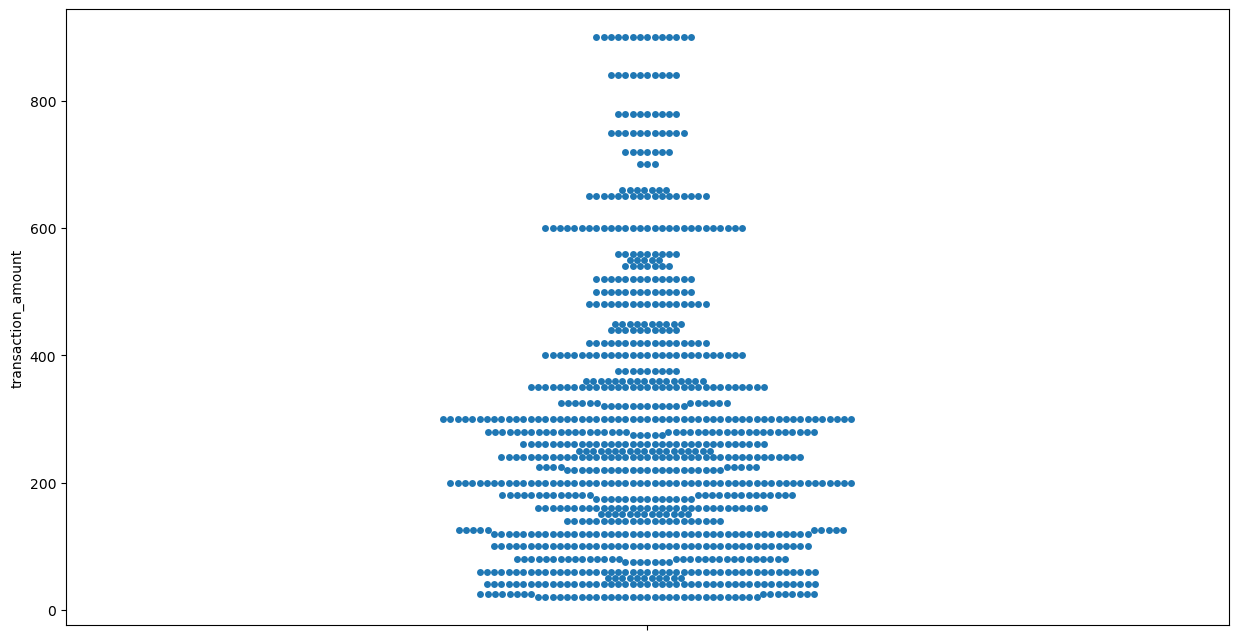

In [203]:
sns.swarmplot(df['transaction_amount'])
plt.show()

In [204]:
#Bivariate

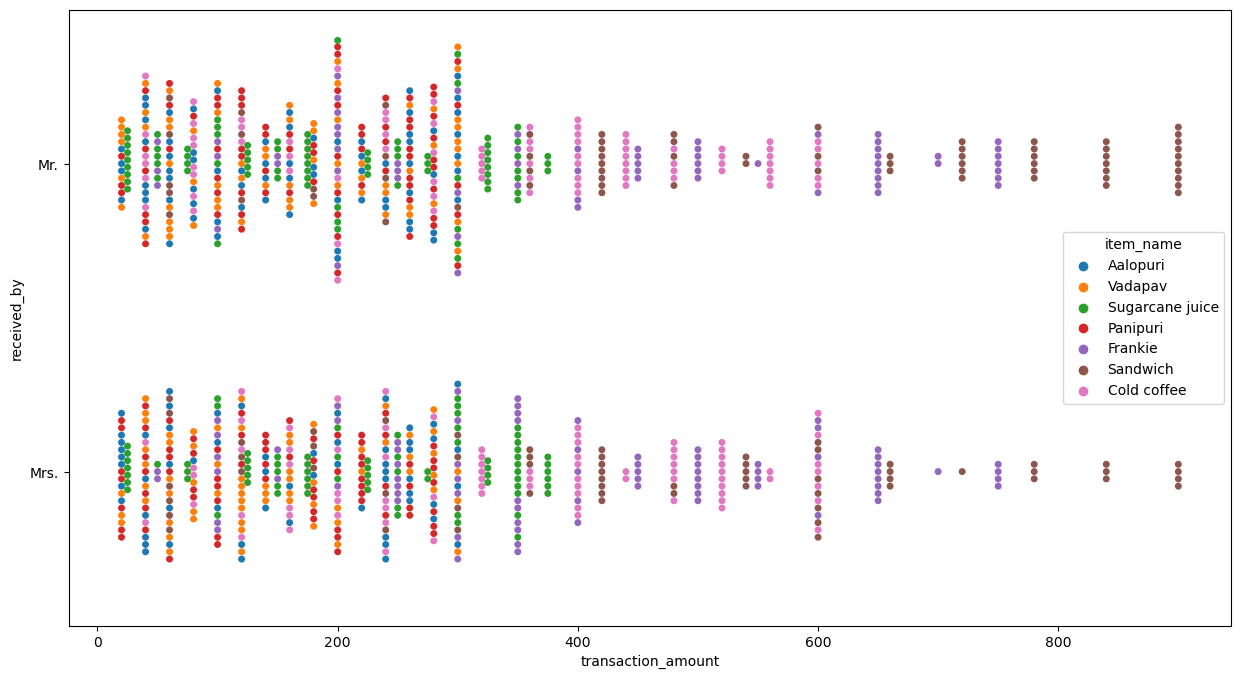

In [207]:
sns.swarmplot(x=df['transaction_amount'],y=df['received_by'],hue=df['item_name'])
plt.show()

In [208]:
#regression plot

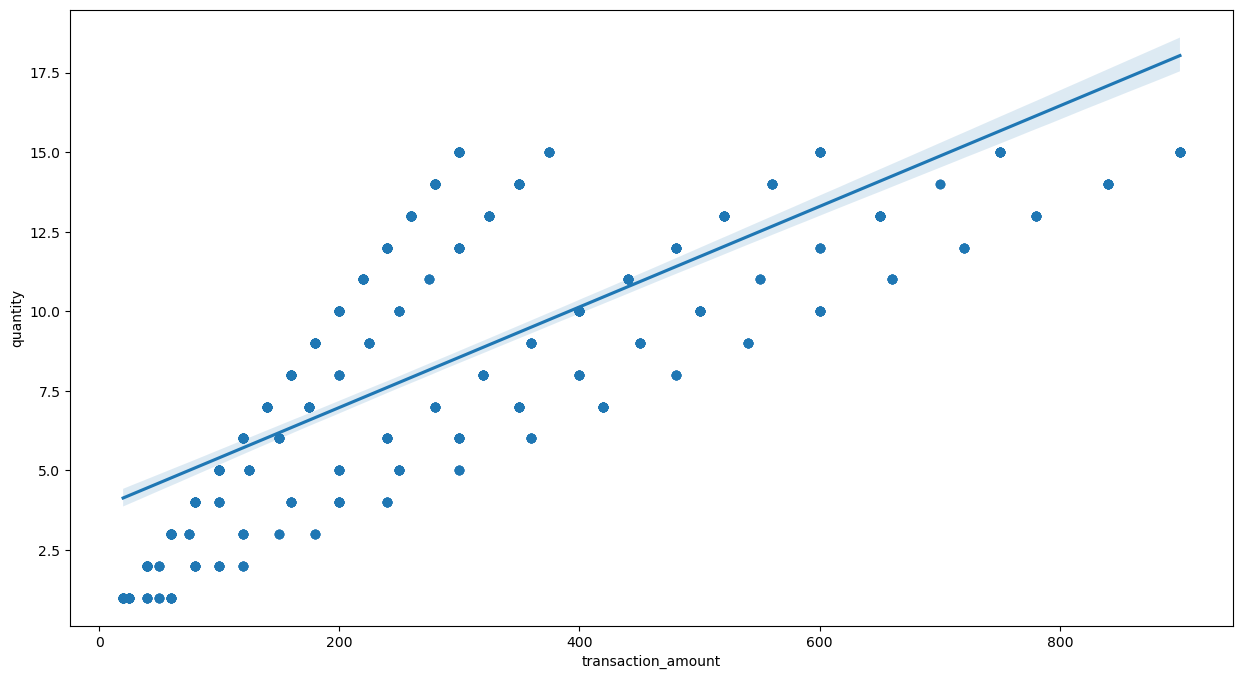

In [211]:
sns.regplot(x=df['transaction_amount'],y=df['quantity'])
plt.show()